# PRCP-1024-TexasSalaryPrediction

---
This database has salary information for positions at all 113 agencies in the Texas state government. The Tribune obtained this data by requesting salary records from the state comptroller, as allowed by the Texas Public Information Act.

`The project aims to analyze Texas state employee payroll data and build a predictive model for salary estimation. Along with this, the analysis explores outliers, wage disparities, and compensation trends across departments and roles.`

Regression-based models were developed using features.
Preprocessing steps included encoding, scaling, and outlier analysis.
Performance was evaluated using MAE, MSE, and R² scores.


### Problem Statement
- Task 1:-Prepare a complete data analysis report on the given data.
- Task 2:-Create a predictive model which will help theTexas state government
team to know the payroll information of employees of the state of Texas.
- Task 3:-
  - Who are the outliers in the salaries?
  - What departments/roles have the biggest wage disparities between
managers and employees?
  - Have salaries and total compensations for some roles/ departments/
head-count changed over time?

## Model Comparison
**Accuracy:**

Linear regression - 15.3%

Decision Tree Regressor - 88.4%

Random Forest Regressor - 92.2%

Gradient Boosting Regressor - 72%

XGBoost Regressor - 92%


**Comparing with RMSE (Root-Mean Squared Error):**

Linear regression - 23321.377

Decision Tree Regressor - 8609.822

Random Forest Regressor - 7067.691

Gradient Boosting Regressor - 13521.778

XGBoost Regressor - 7192.290

`The Random Forest Regressor shows the least error with high accuracy among all models.`

## Challenges

- Presence of outliers in salary-related columns (MONTHLY, ANNUAL).

- Missing values in certain fields.

- Constant/unique columns that don’t add predictive value.

- Salaries were skewed with a long tail (few employees earning extremely high salaries).

- Some features like HRLY RATE and HRS PER WK showed non-normal distributions.

- Multiple categorical features (AGENCY NAME, CLASS TITLE, STATUS, GENDER, ETHNICITY). Label encoding/mapping was needed for modeling.

In [32]:
#installing packages
!pip install autoviz  
!pip install sweetviz  
!pip install --upgrade numpy
!pip install "numpy<2.0"

  Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl (13.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.3.2 which is incompatible.
category-encoders 2.8.1 requires scikit-learn>=1.6.0, but you have scikit-learn 1.5.2 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
orange3 3.38.1 requires numpy<2,>=1.20.0, but you have numpy 2.3.2 which is incompatible.
orange3 3.38.1 requires xgboost<2.1,>=1.7.4, but you have xgboost 1.6.2 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.1 requires scikit-learn>=1.6.0, but you have scikit-learn 1.5.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
orange3 3.38.1 requires xgboost<2.1,>=1.7.4, but you have xgboost 1.6.2 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.
ydata-profiling 4.16.1 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.5 which is incompatible.
ydata-profiling 4.16.1 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.


In [33]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# To define VisibleDeprecationWarning if missing
if not hasattr(np, "VisibleDeprecationWarning"):
    np.VisibleDeprecationWarning = DeprecationWarning

In [168]:
#load the data
data = pd.read_csv('salary.csv')

## Basic Checks

In [35]:
data.shape

(149481, 21)

In [36]:
data.head()

AGENCY                     AGENCY NAME                      \
0    241   COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION    
1    212   OFFICE OF COURT ADMINISTRATION                       
2    241   COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION    
3    212   OFFICE OF COURT ADMINISTRATION                       
4    696   TEXAS DEPARTMENT OF CRIMINAL JUSTICE                 

             LAST NAME                       FIRST NAME           MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS CODE                     CLASS TITLE                      \
0  JD25       JUDGE, RETIRED                                       
1  3524       GENERAL COUNSEL IV                                   
2  JD25       JUDGE, RETIRED                                       
3  3524       GENERAL COUNSEL IV                                   
4  4504       CORREC  OFFICER IV                                   

     ETHNICITY          GENDER                        STATUS                   \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

  EMPLOY DATE  HRLY RATE  HRS PER WK  MONTHLY   ANNUAL    STATE NUMBER  \
0   02/18/88   75.96150      29.0     9545.82  114549.84     127717      
1   02/01/15   81.04454       4.0     1404.77   16857.24     127717      
2   02/01/20   75.96150      29.0     9545.82  114549.84      59115      
3   09/01/18   81.04453       4.0     1404.77   16857.24      59115      
4   06/29/20    0.00000      40.0     3284.27   39411.24     165030      

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0    True               NaN                     NaN            
1    True               NaN                     NaN            
2    True               NaN                     NaN            
3    True               NaN                     NaN            
4    True               1.0                     NaN            

   summed_annual_salary hide_from_search  
0        131407.08             NaN        
1              NaN            True        
2        131407.08             NaN        
3              NaN            True        
4              NaN             NaN

In [37]:
data.tail()

AGENCY                     AGENCY NAME                      \
149476    809   STATE PRESERVATION BOARD                             
149477    809   STATE PRESERVATION BOARD                             
149478    809   STATE PRESERVATION BOARD                             
149479    809   STATE PRESERVATION BOARD                             
149480    809   STATE PRESERVATION BOARD                             

                  LAST NAME                       FIRST NAME           MI  \
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                     CLASS TITLE                      \
149476  6232       SECURITY OFFICER III                                 
149477  0302       WEB ADMINISTRATOR III                                
149478  0130       CUSTOMER SERVICE REP I                               
149479  1572       PROGRAM SPECIALIST III                               
149480  0130       CUSTOMER SERVICE REP I                               

          ETHNICITY          GENDER       \
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                         STATUS                  EMPLOY DATE  HRLY RATE  \
149476  CRF - CLASSIFIED REGULAR FULL-TIME         10/30/17      0.00     
149477  CRF - CLASSIFIED REGULAR FULL-TIME         07/13/15      0.00     
149478  CRP - CLASSIFIED REGULAR PART-TIME         10/15/12     12.93     
149479  CRF - CLASSIFIED REGULAR FULL-TIME         09/22/89      0.00     
149480  CRP - CLASSIFIED REGULAR PART-TIME         02/16/12     11.74     

        HRS PER WK  MONTHLY   ANNUAL   STATE NUMBER duplicated  \
149476     40.0     2899.00  34788.00     770781        NaN      
149477     40.0     5500.00  66000.00     847431        NaN      
149478     20.0     1120.60  13447.20      34266        NaN      
149479     40.0     5744.16  68929.92     123490        NaN      
149480     20.0     1017.46  12209.52     103583        NaN      

        multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
149476           NaN                      NaN                   NaN            
149477           NaN                      NaN                   NaN            
149478           NaN                      NaN                   NaN            
149479           NaN                      NaN                   NaN            
149480           NaN                      NaN                   NaN            

       hide_from_search  
149476        NaN        
149477        NaN        
149478        NaN        
149479        NaN        
149480        NaN

In [38]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [39]:
data.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [41]:
#Summary Statistics
data.describe().T

count       mean            std         min    \
AGENCY                   149481.0     545.736288     139.057691    101.0   
HRLY RATE                149481.0       0.346488       4.211485      0.0   
HRS PER WK               149481.0      39.714918       2.323855      1.0   
MONTHLY                  149481.0    4226.184248    2093.111691     50.0   
ANNUAL                   149481.0   50714.210973   25117.340292    600.0   
STATE NUMBER             149481.0  565193.023521  478621.220542      1.0   
multiple_full_time_jobs      14.0       1.000000       0.000000      1.0   
summed_annual_salary         16.0   74303.955000   51925.944282  18000.0   

                            25%        50%         75%          max      
AGENCY                      529.00     530.00      696.00  9.300000e+02  
HRLY RATE                     0.00       0.00        0.00  1.177885e+02  
HRS PER WK                   40.00      40.00       40.00  7.000000e+01  
MONTHLY                    3019.84    3720.17     4865.81  4.612500e+04  
ANNUAL                    36238.08   44642.04    58389.72  5.535000e+05  
STATE NUMBER             113334.00  346373.00  1100500.00  1.271604e+06  
multiple_full_time_jobs       1.00       1.00        1.00  1.000000e+00  
summed_annual_salary      32962.50   48063.30   123751.77  1.713834e+05

In [42]:
data.describe(include='object').T

count  unique  \
AGENCY NAME             149481    113   
LAST NAME               149481  38675   
FIRST NAME              149481  23559   
MI                      149481     27   
CLASS CODE              149481   1481   
CLASS TITLE             149481   1422   
ETHNICITY               149481      6   
GENDER                  149481      2   
STATUS                  149481     11   
EMPLOY DATE             149481   6295   
duplicated                 143      1   
combined_multiple_jobs      97      1   
hide_from_search            16      1   

                                               top                          \
AGENCY NAME             HEALTH AND HUMAN SERVICES COMMISSION                 
LAST NAME                                   SMITH                            
FIRST NAME                                  MICHAEL                          
MI                                                                           
CLASS CODE                                                        4504       
CLASS TITLE             CORREC  OFFICER IV                                   
ETHNICITY                                                  WHITE             
GENDER                                                     FEMALE            
STATUS                            CRF - CLASSIFIED REGULAR FULL-TIME         
EMPLOY DATE                                                       09/01/17   
duplicated                                                            True   
combined_multiple_jobs                                                True   
hide_from_search                                                      True   

                         freq   
AGENCY NAME              36667  
LAST NAME                 1243  
FIRST NAME                1843  
MI                       38408  
CLASS CODE                9267  
CLASS TITLE               9267  
ETHNICITY                67142  
GENDER                   85328  
STATUS                  142502  
EMPLOY DATE              12359  
duplicated                 143  
combined_multiple_jobs      97  
hide_from_search            16

## Exploratory Data Analysis
1. Univariate Analysis : Analyzes a single column.
   - Salary distributions were right-skewed with many employees earning below the mean.


2. Bivariate Analysis : Analyzes two columns.
   - Salary variations were significant across status types (ERF, URF, etc.) and departments.

     
3. Multivariate Analysis : Analyzes multiple columns.
   - Managerial roles consistently earned higher wages, with notable disparities across departments.

Shape of your Data Set loaded: (149481, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  3
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  5
    20 Predictors classified...
        6 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['STATE NUMBER', 'duplicated', 'multiple_full_time_jobs', 'combine

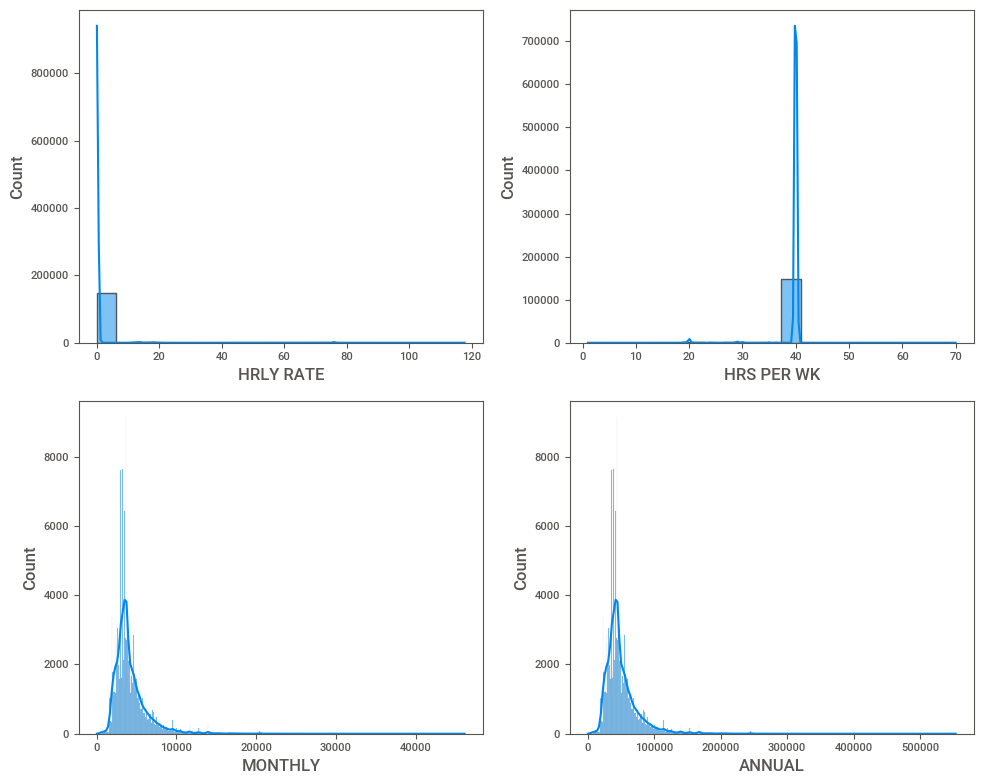

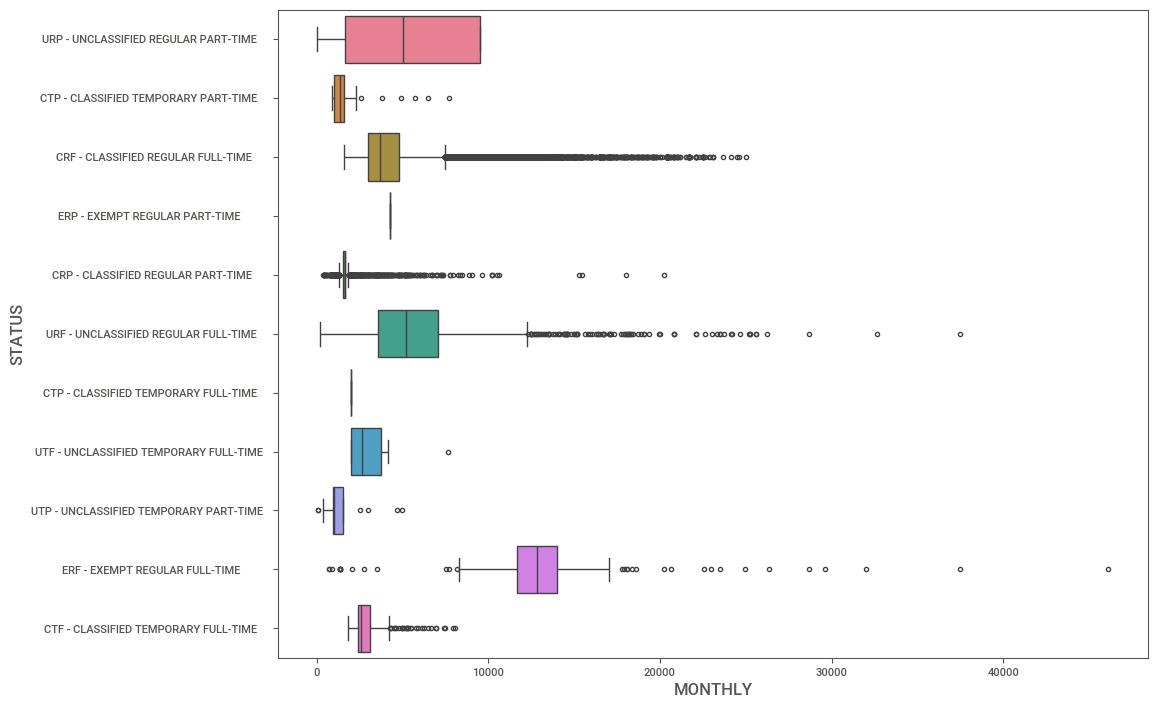

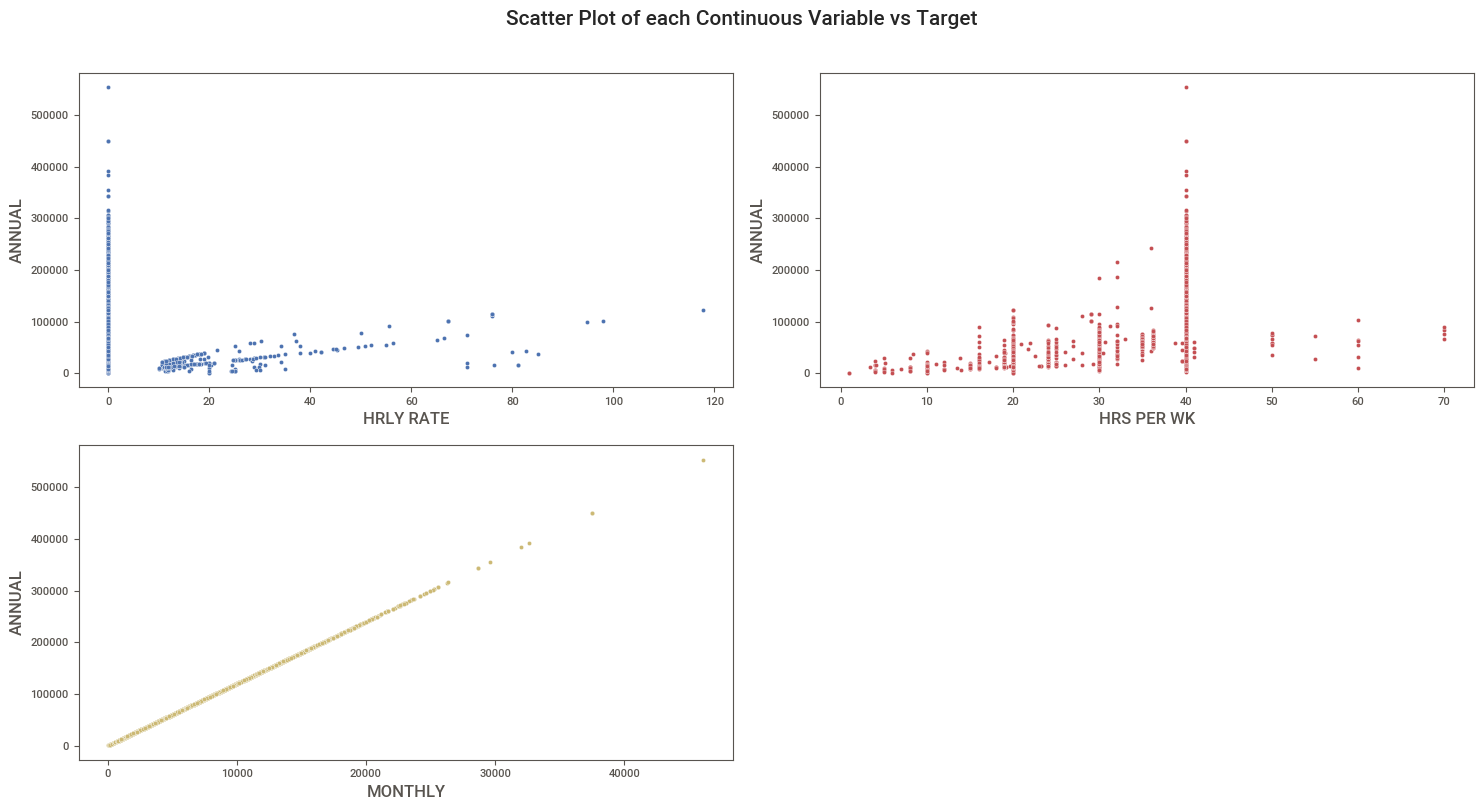

Number of All Scatter Plots = 6


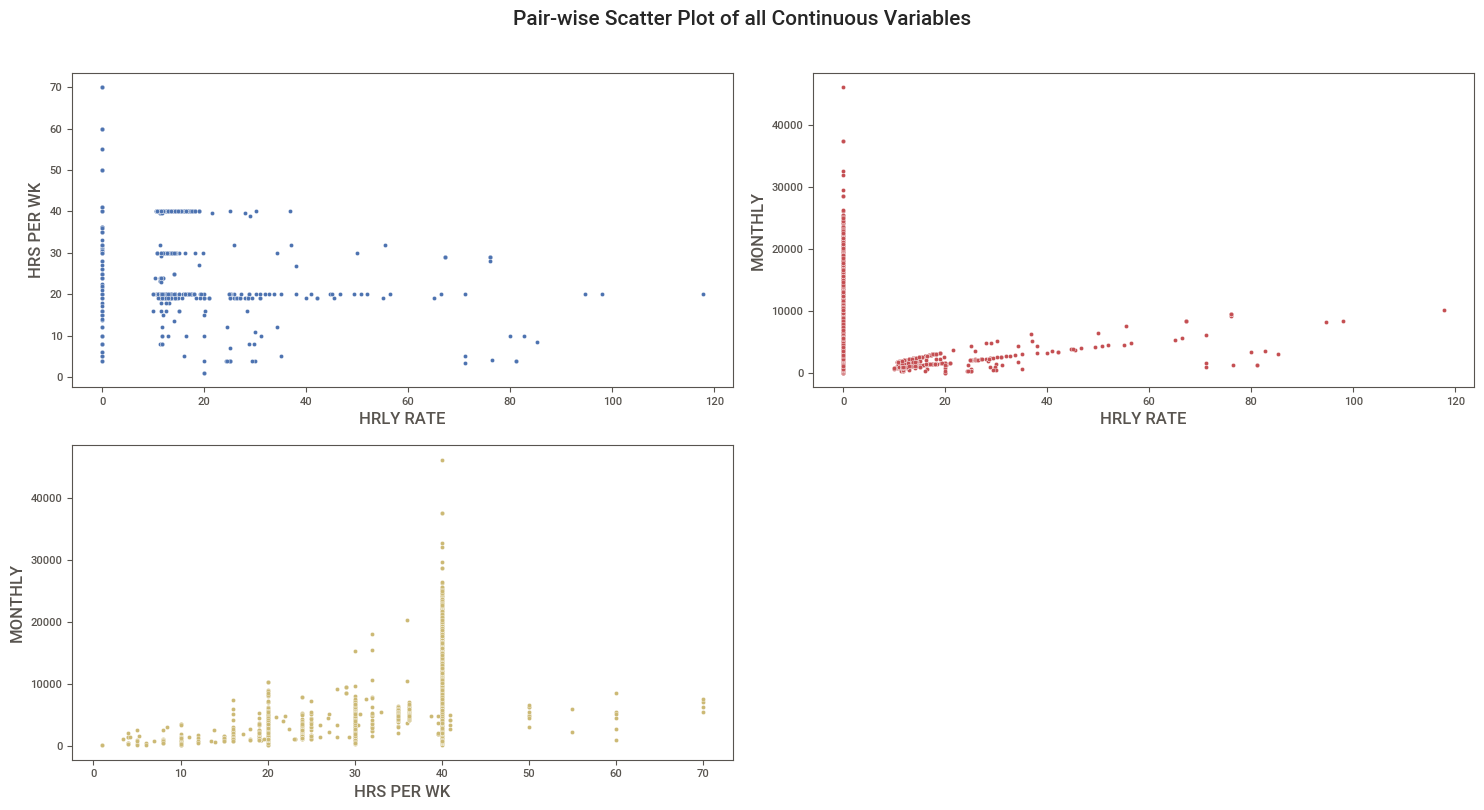

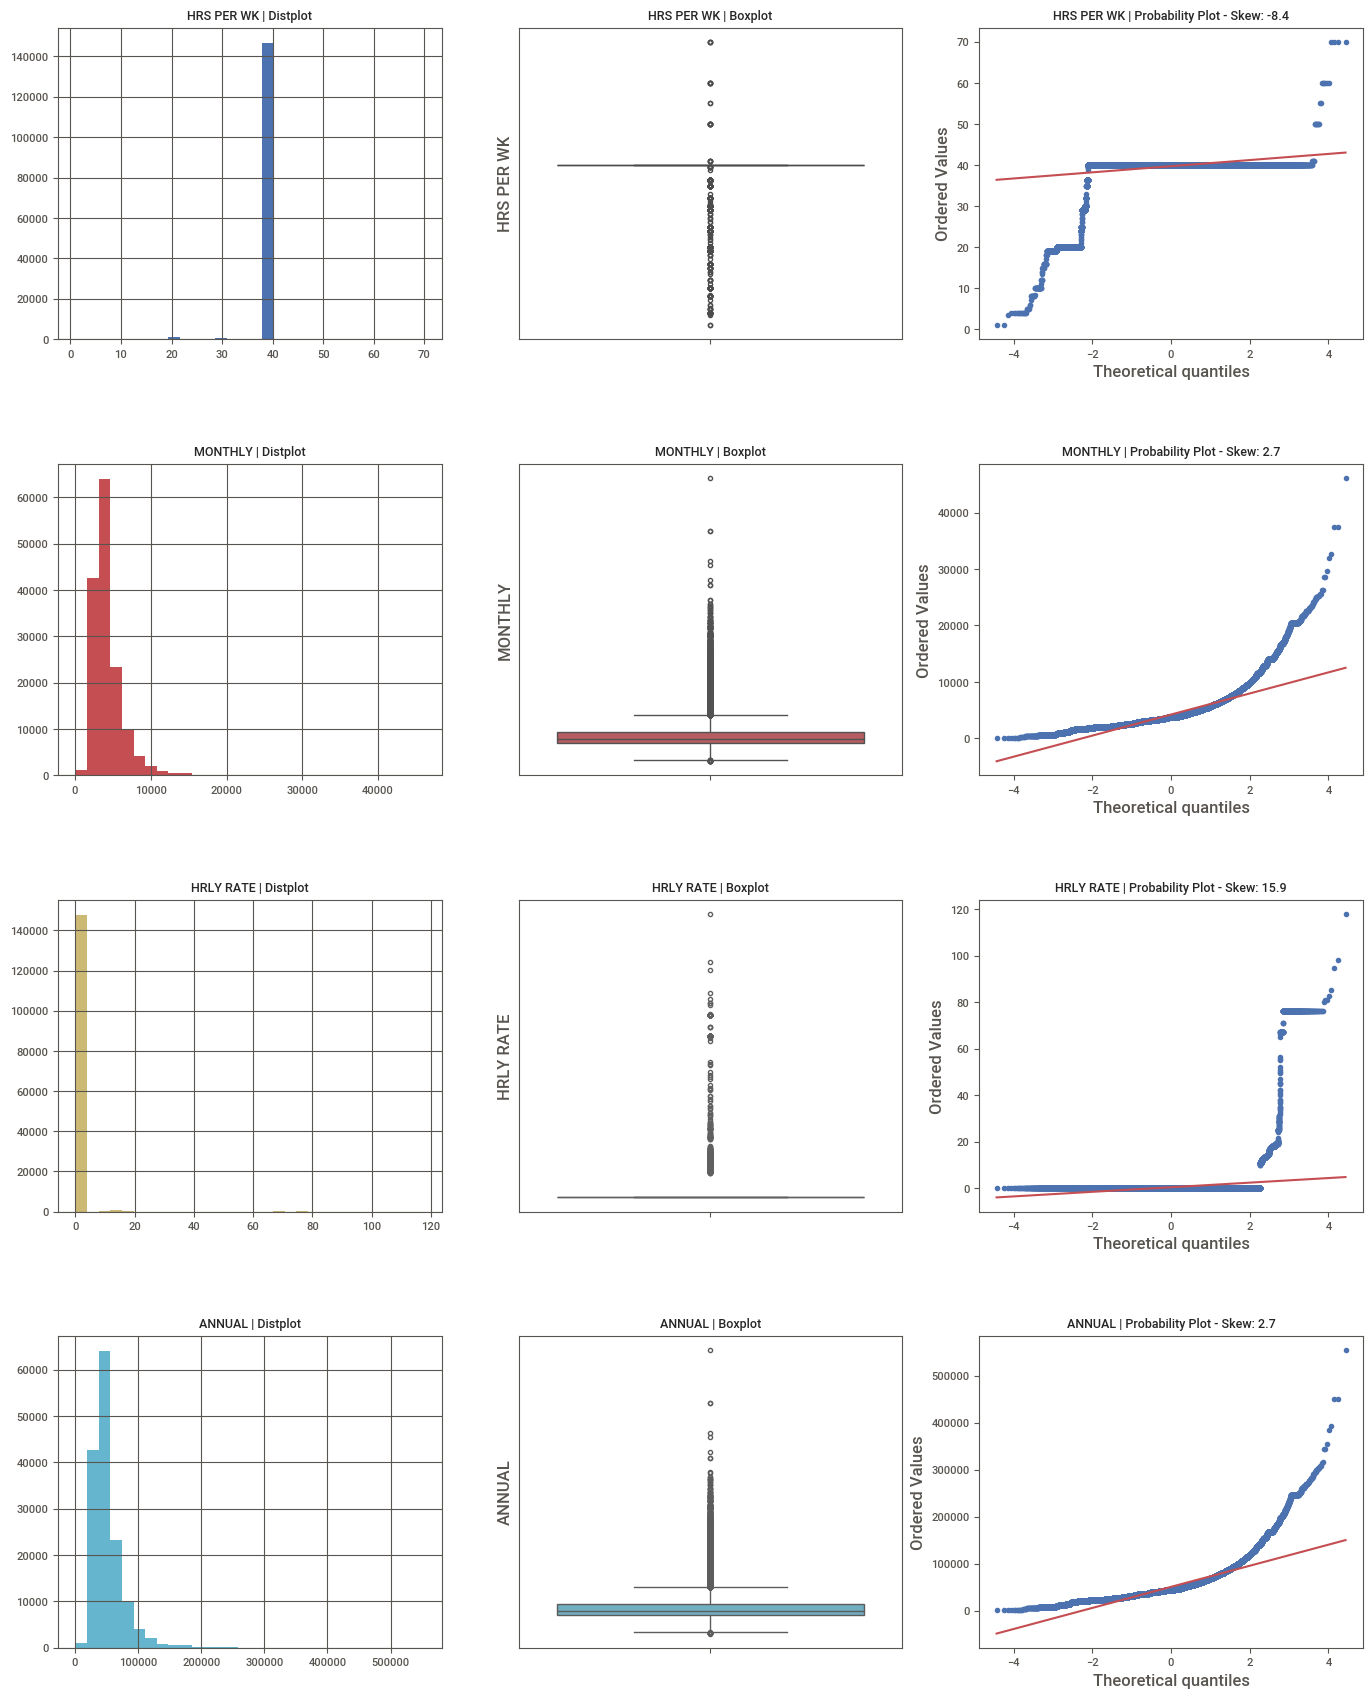

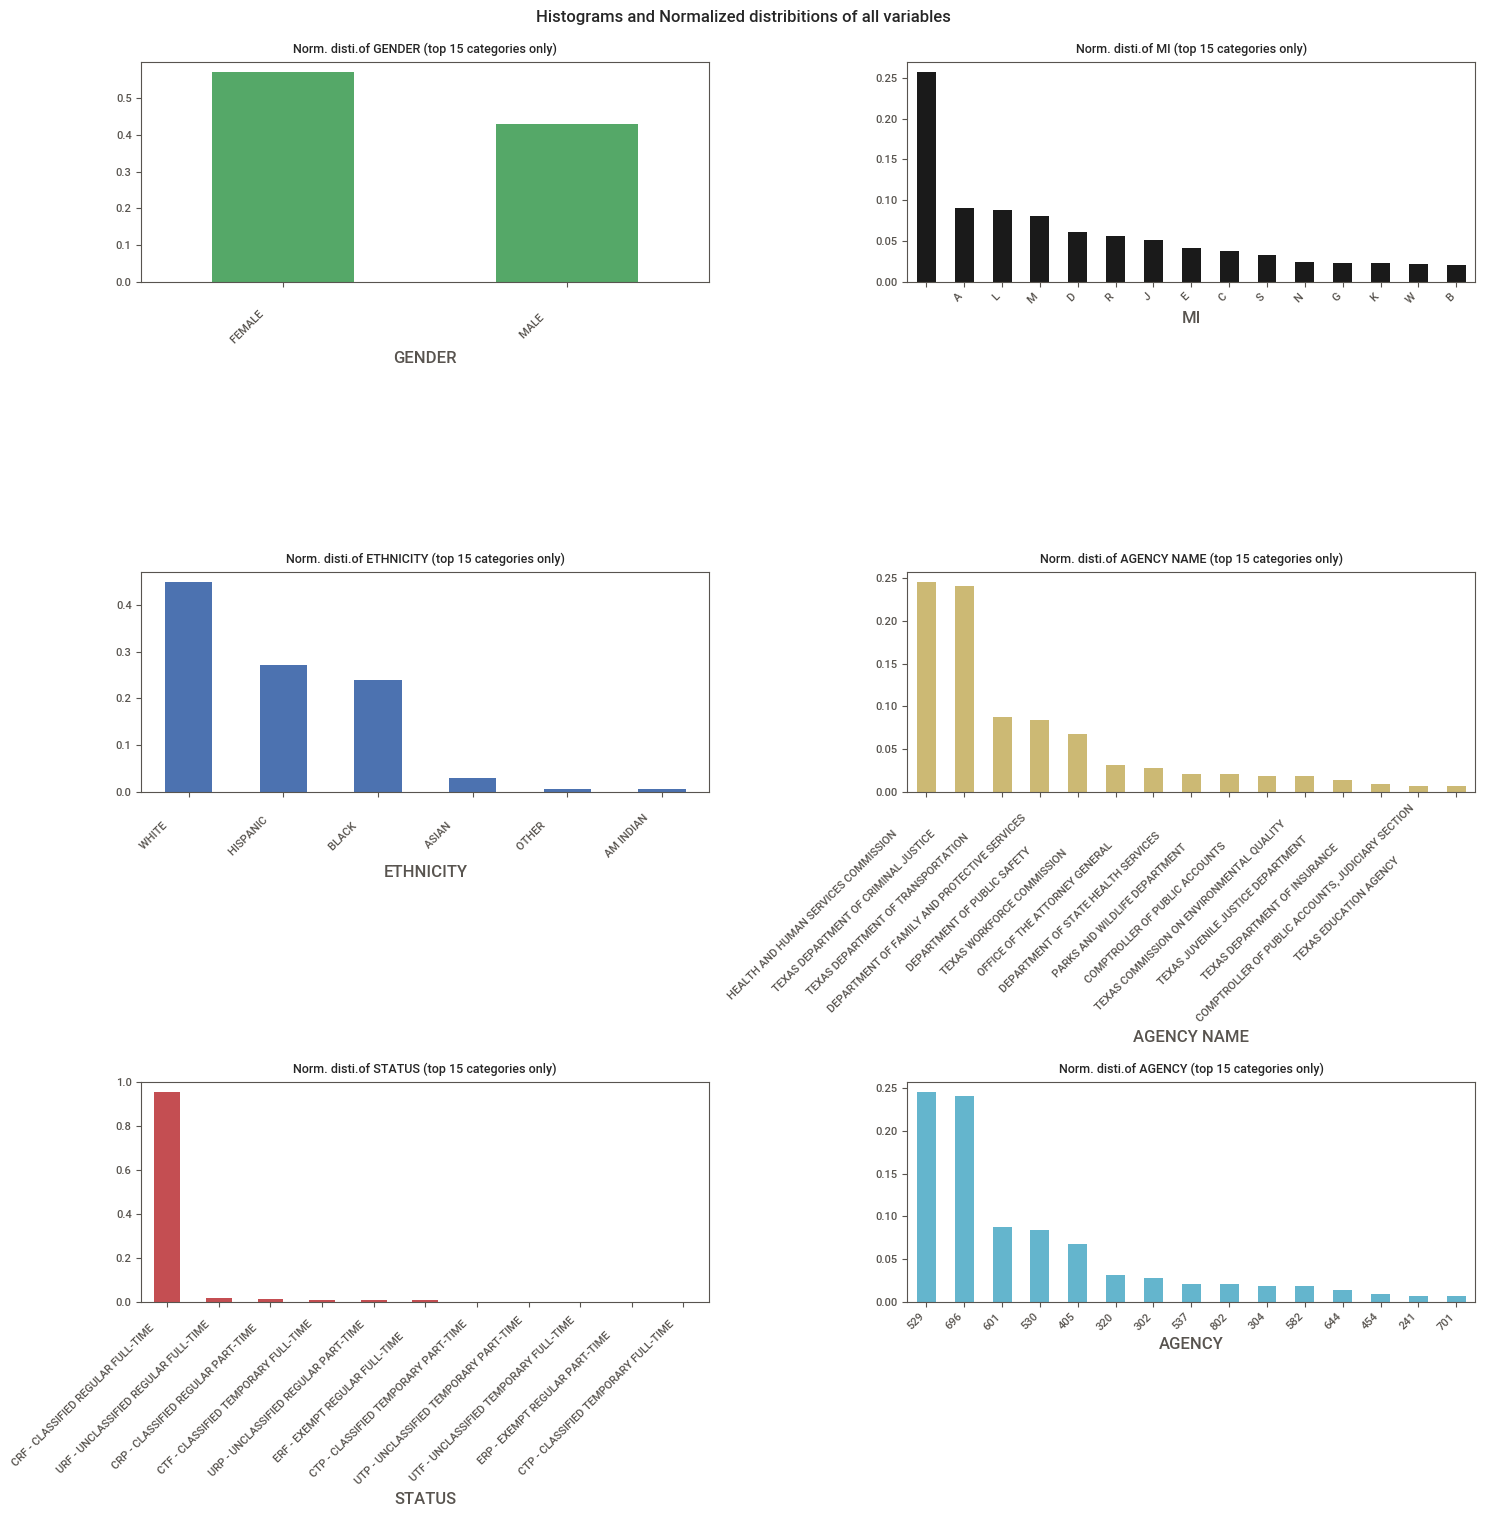

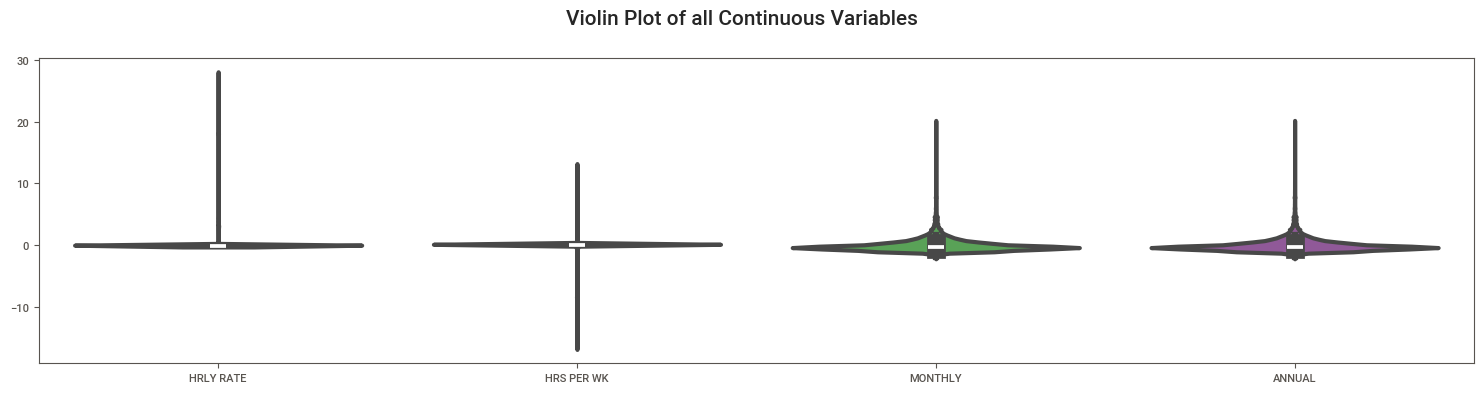

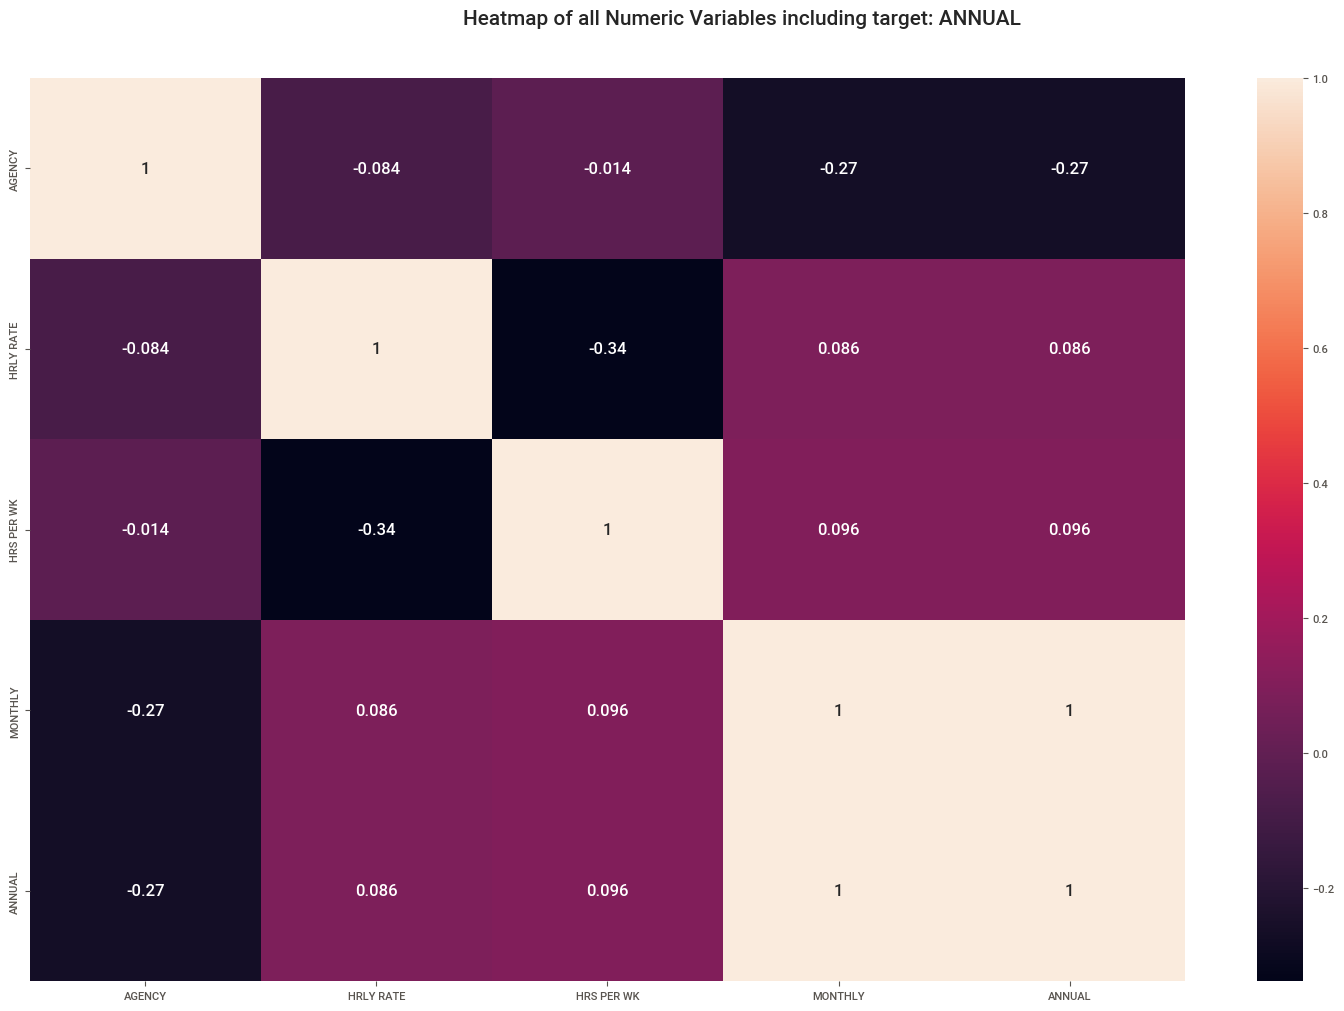

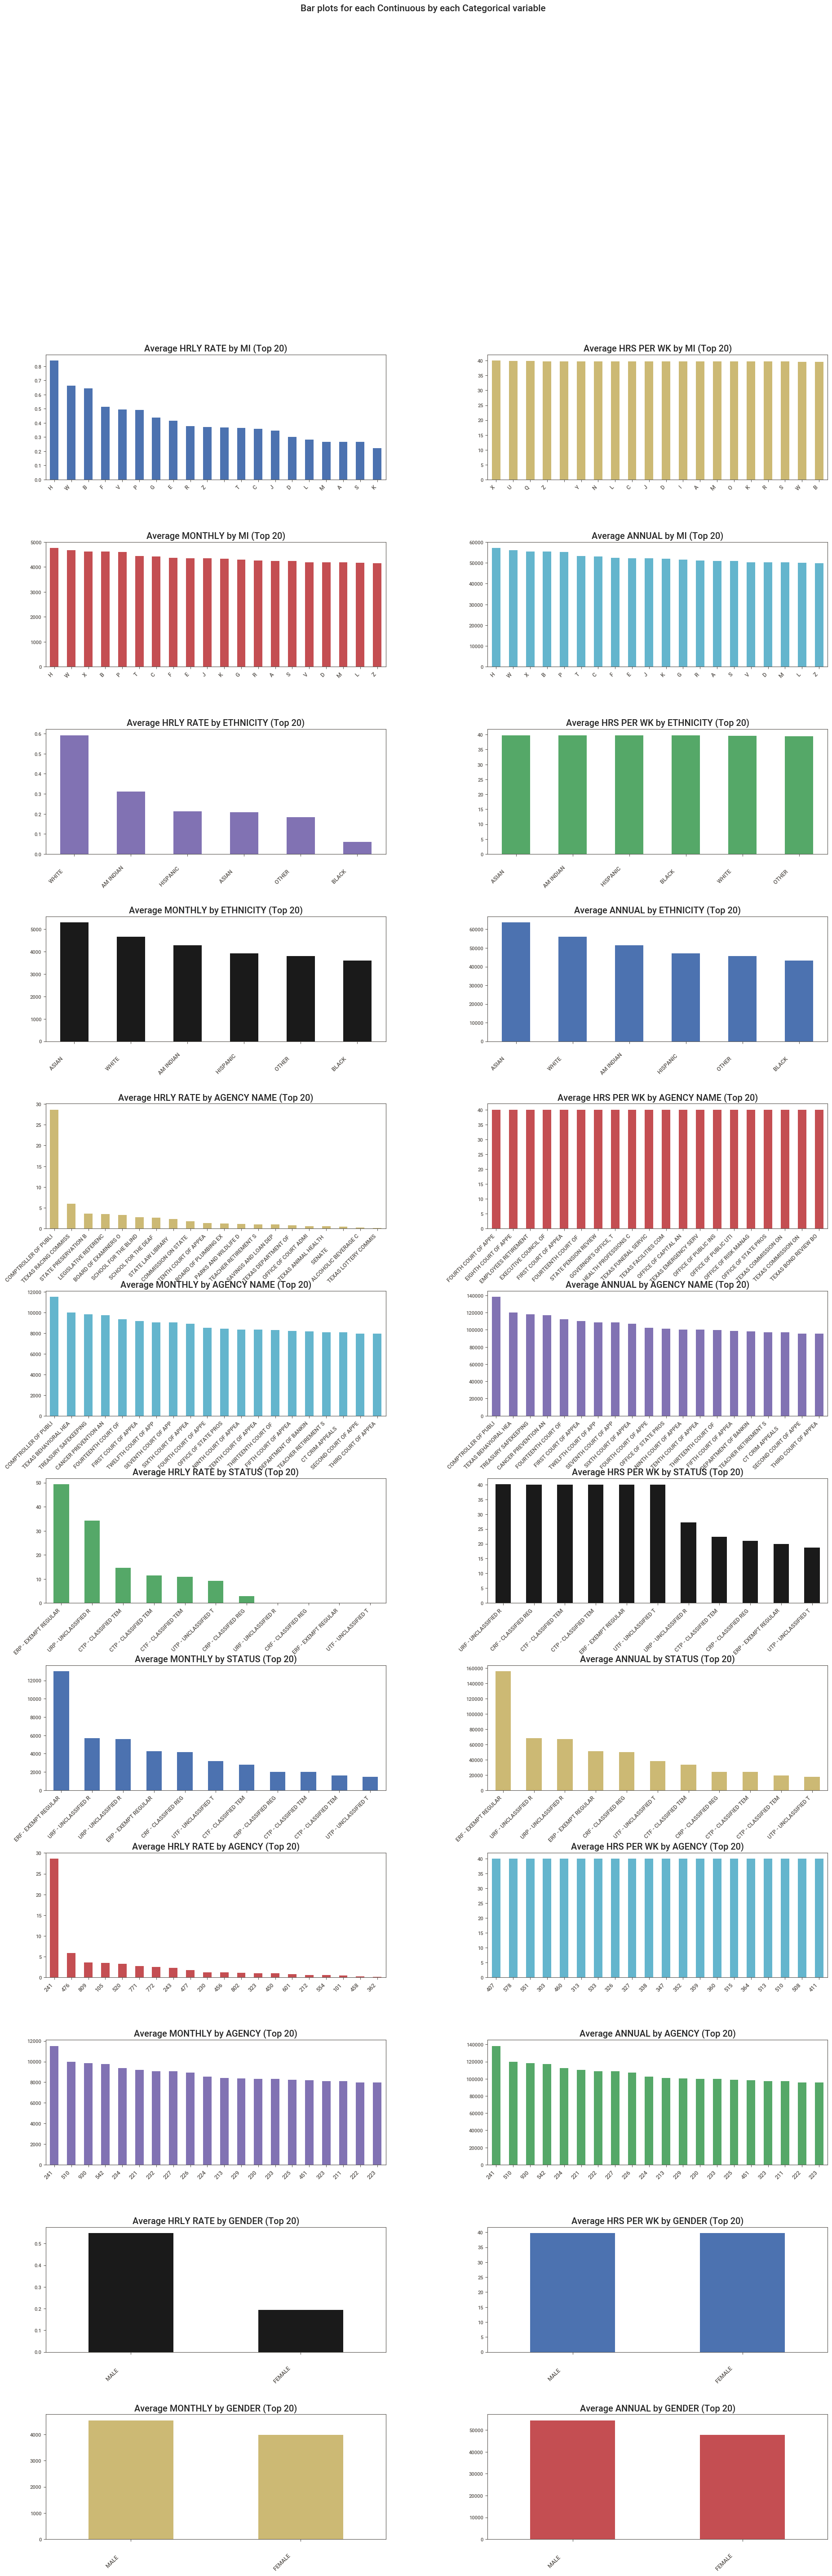

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Salman\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Salman\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Salman\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Salman\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Salman\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

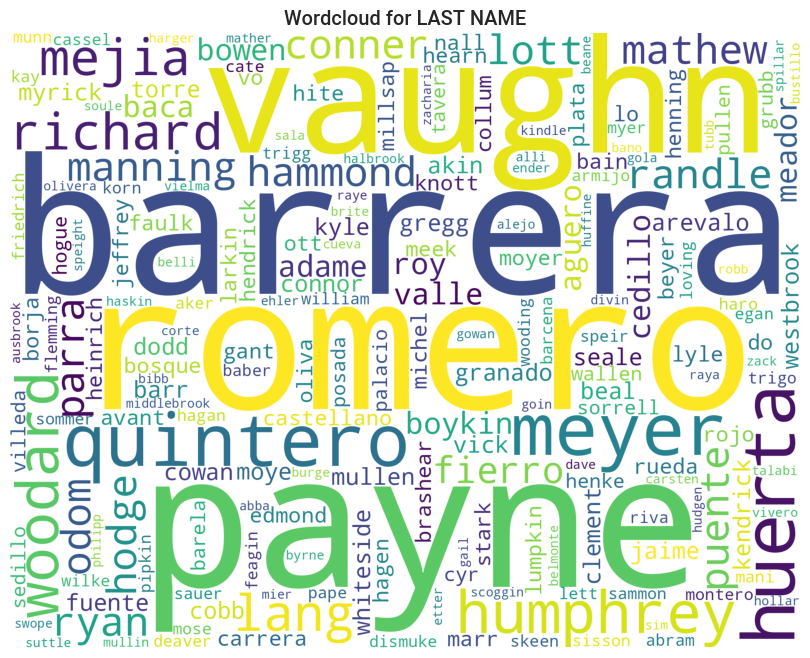

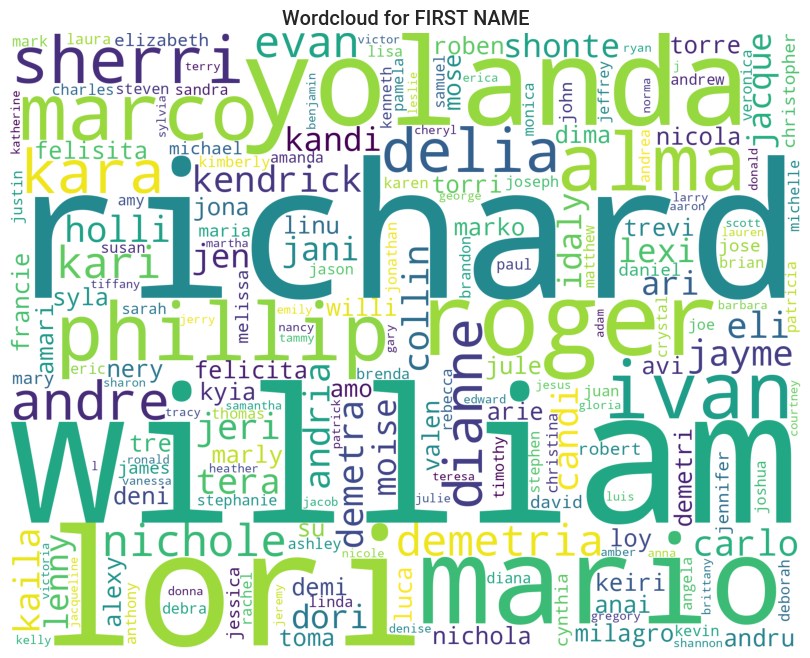

Could not draw wordcloud plot for EMPLOY DATE. We need at least 1 word to plot a word cloud, got 0.


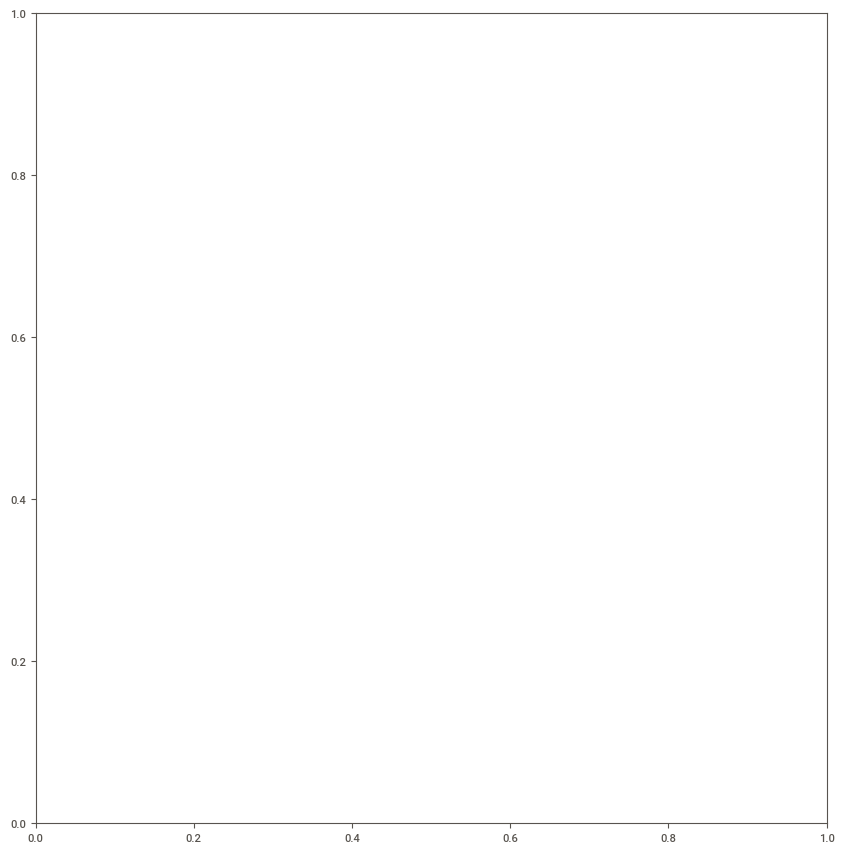

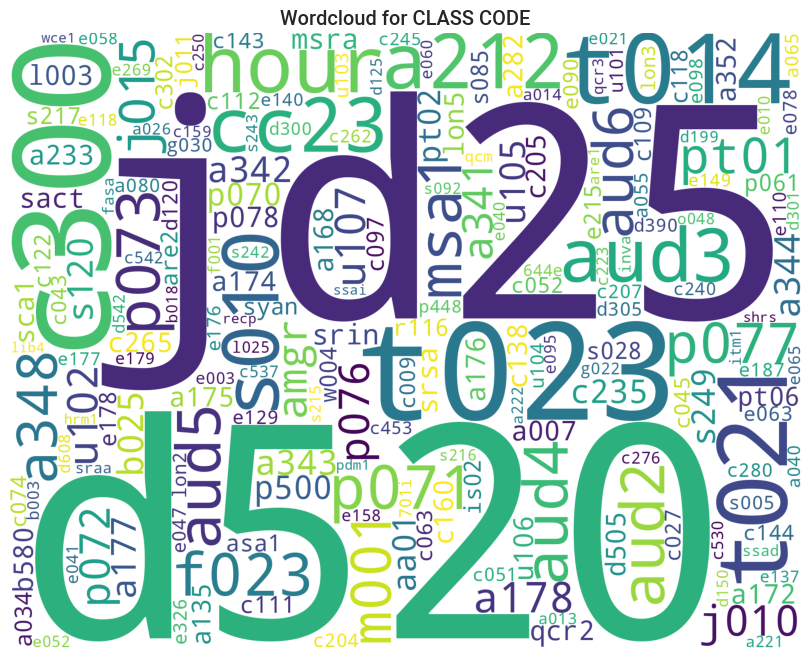

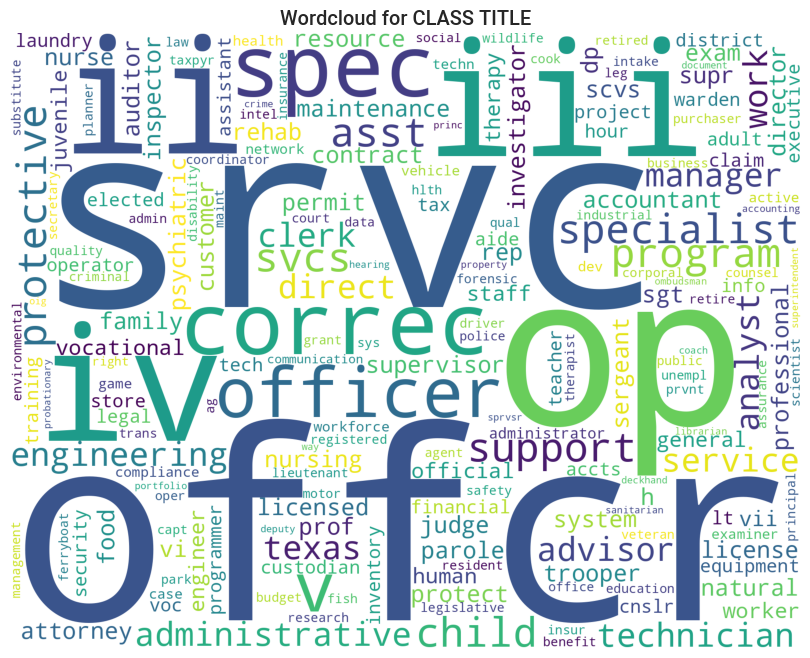

All Plots done
Time to run AutoViz = 241 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [43]:
from autoviz.AutoViz_Class import AutoViz_Class
av = AutoViz_Class()
df_av=av.AutoViz('salary.csv', depVar='ANNUAL', verbose=1)

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:01 -> (00:00 left)



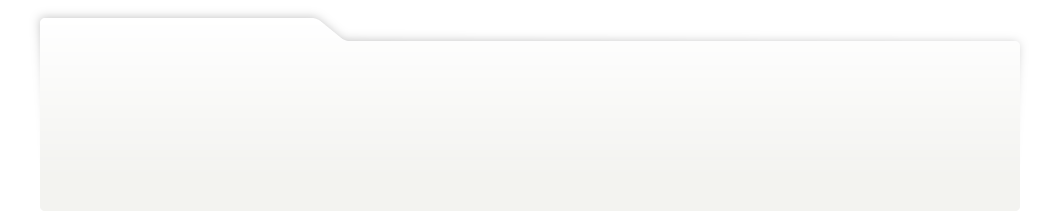
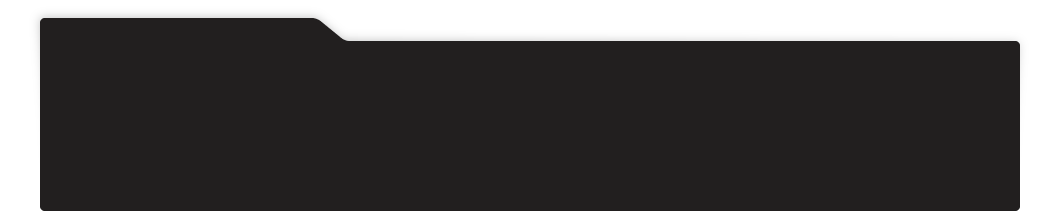
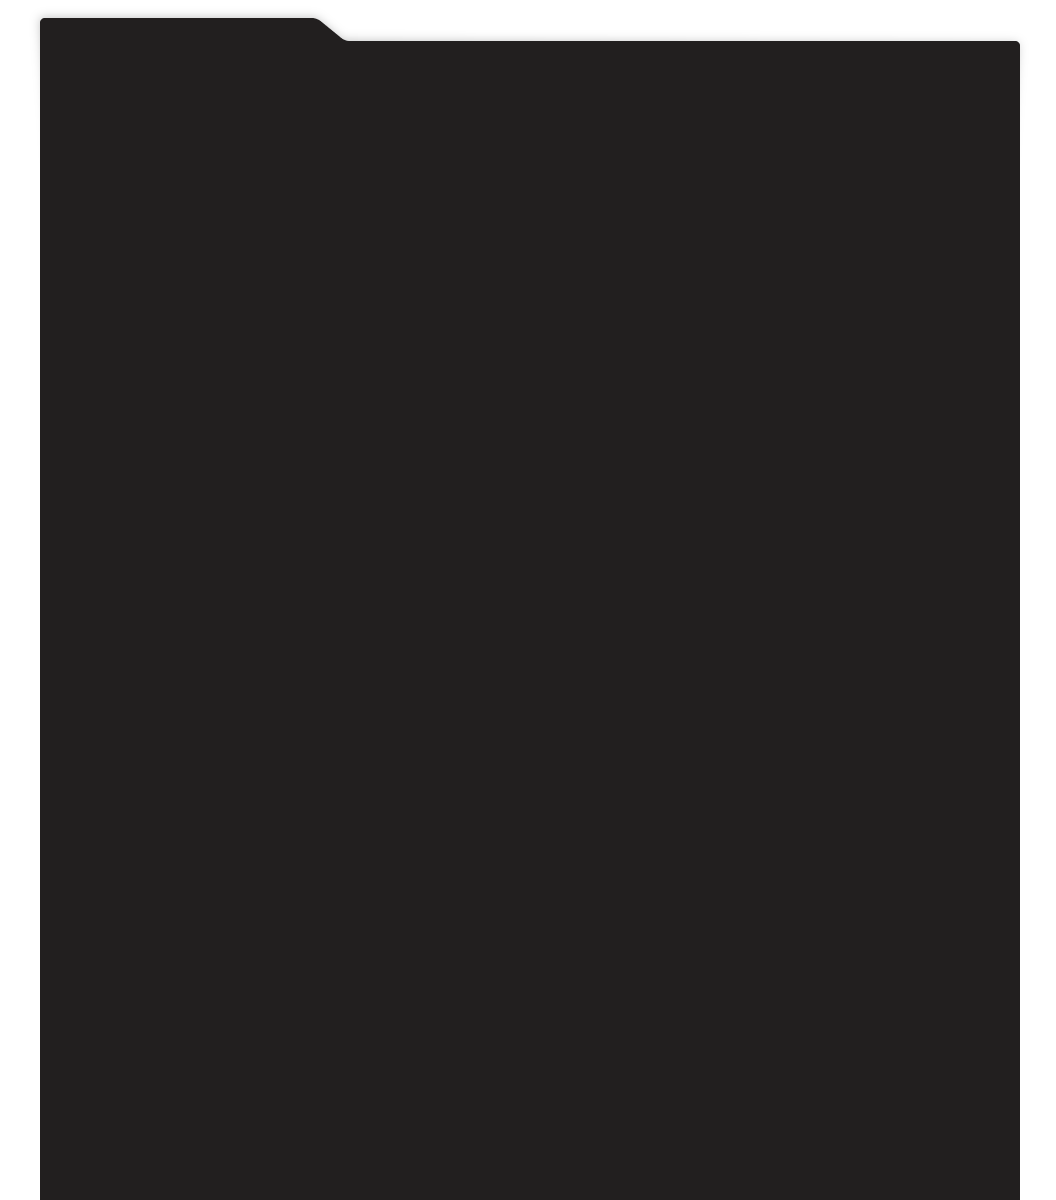
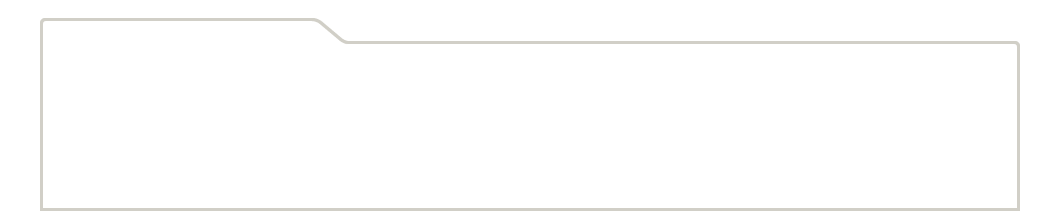
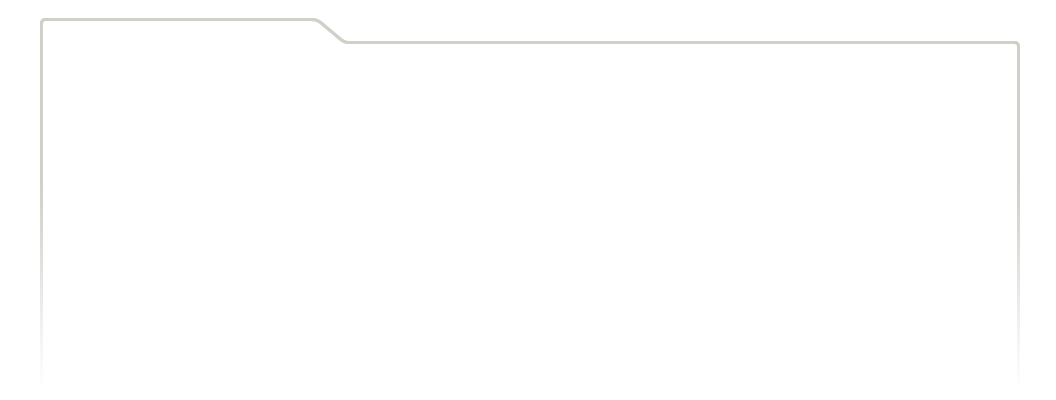
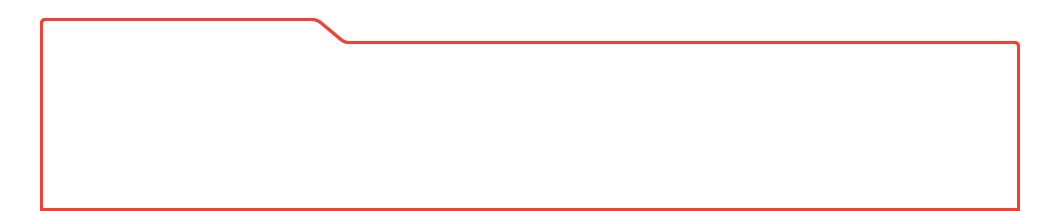
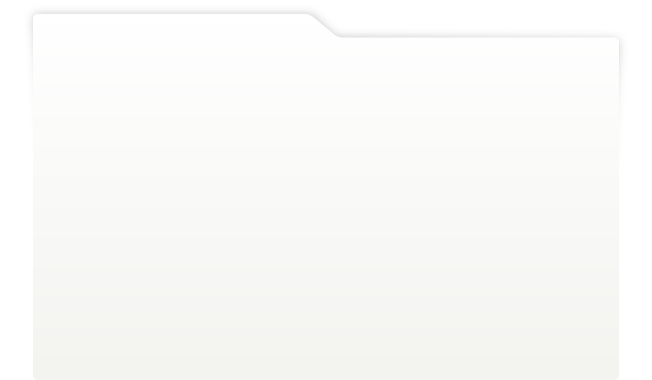
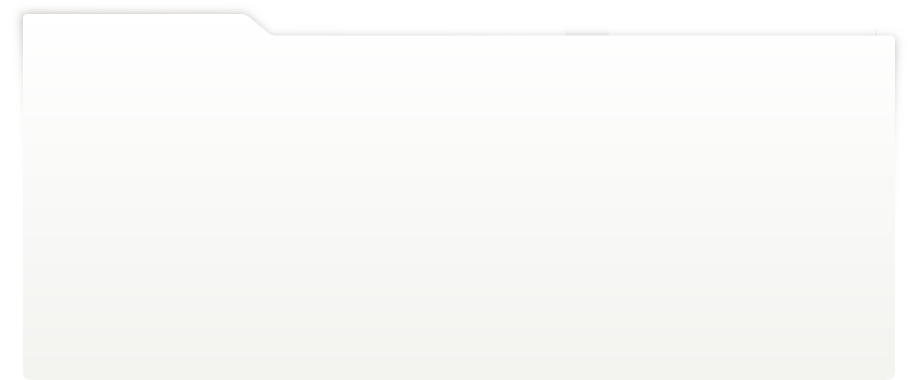
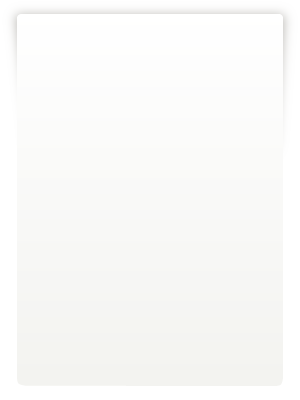
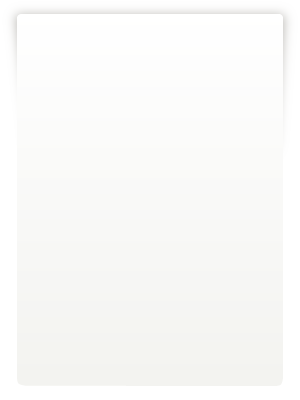
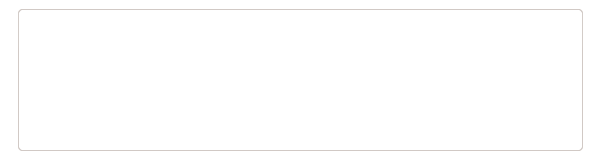
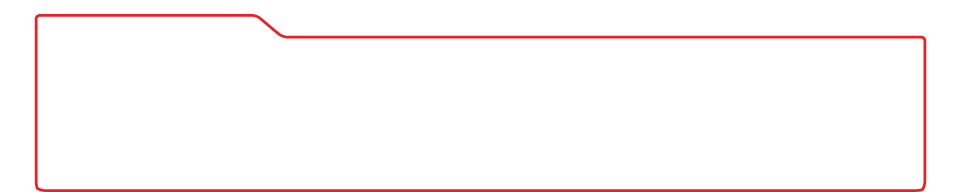
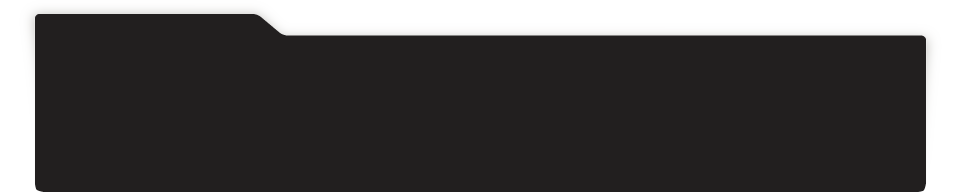
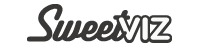
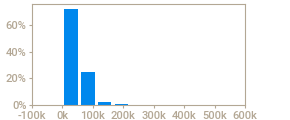
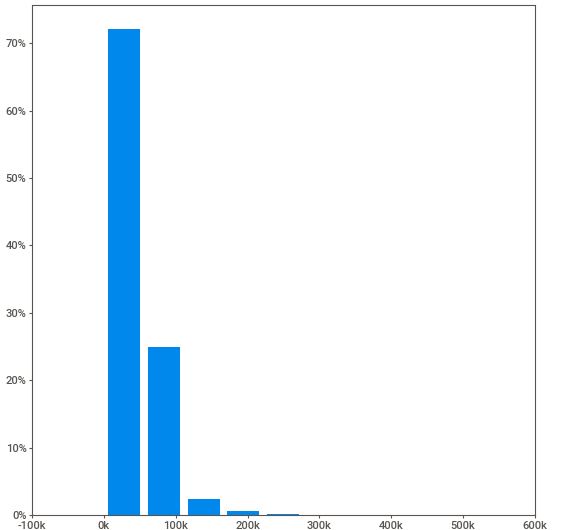
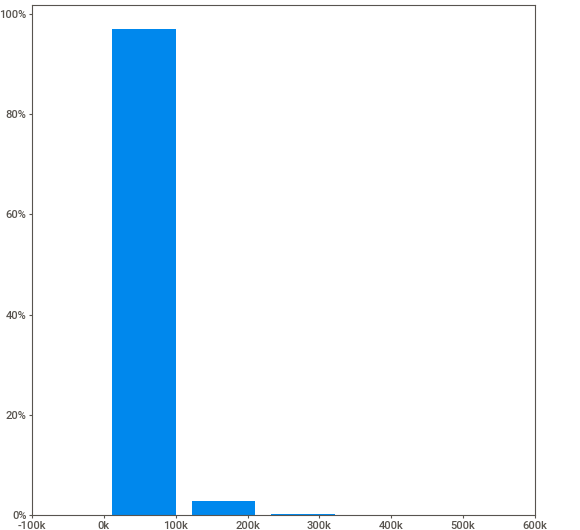
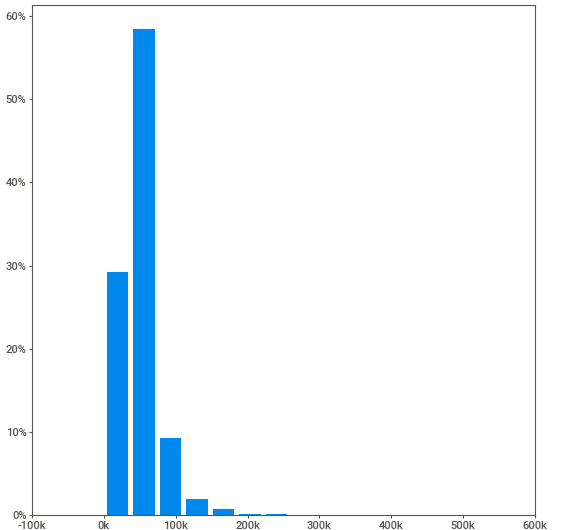
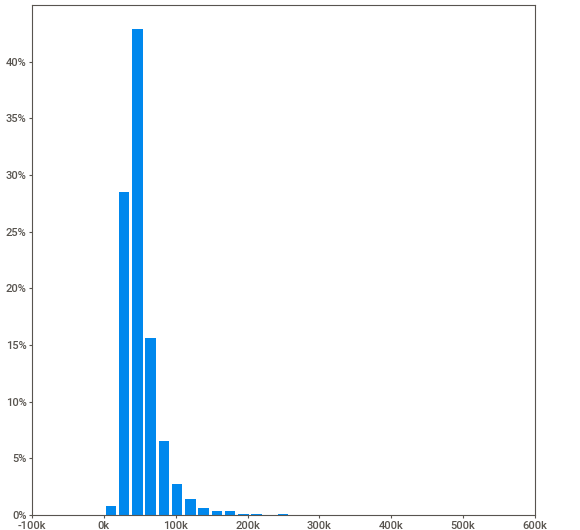
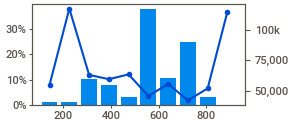
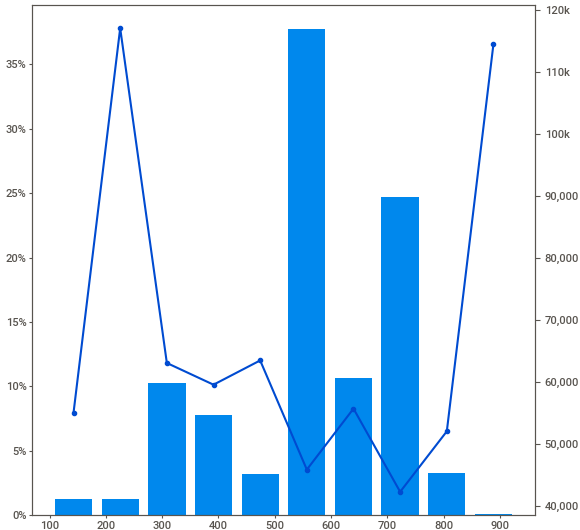
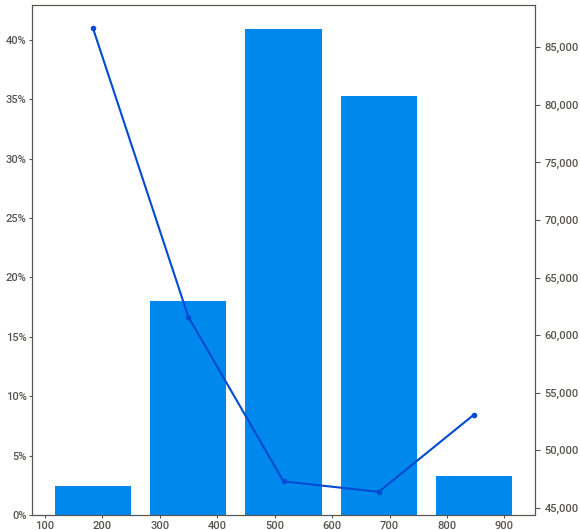
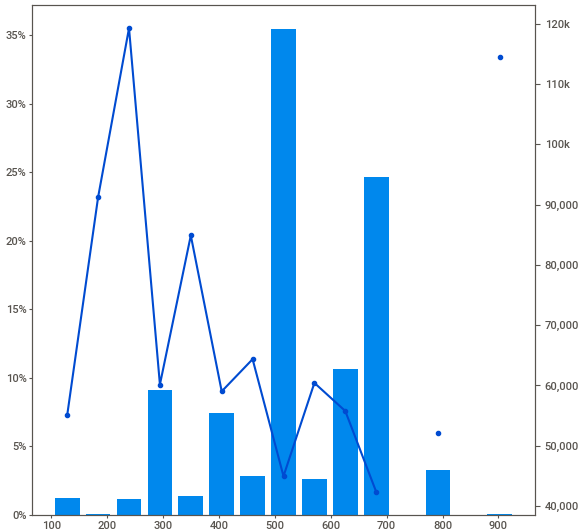
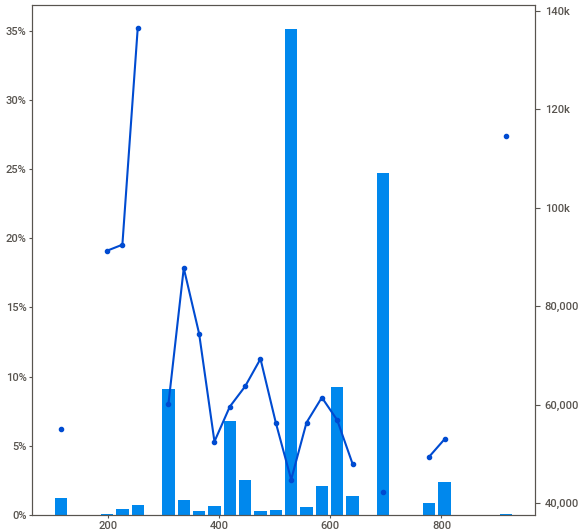
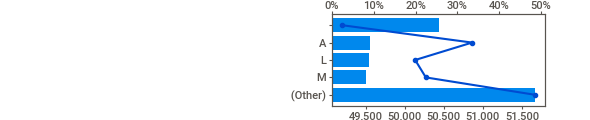
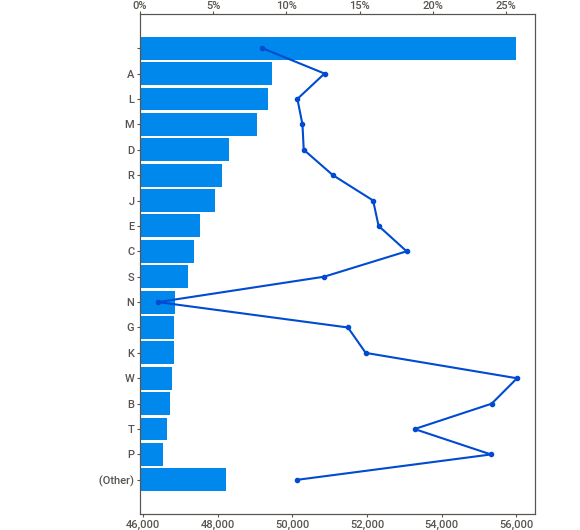
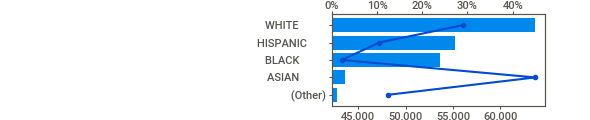
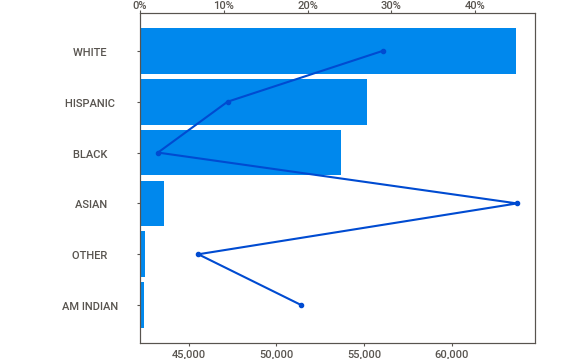
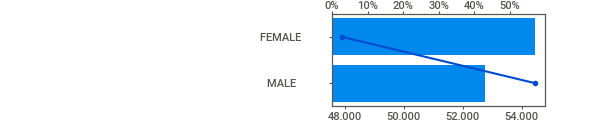
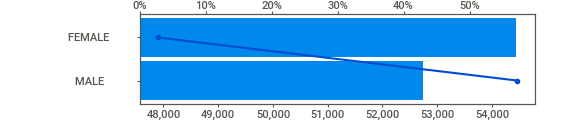
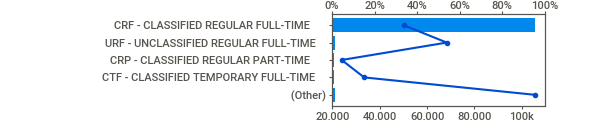
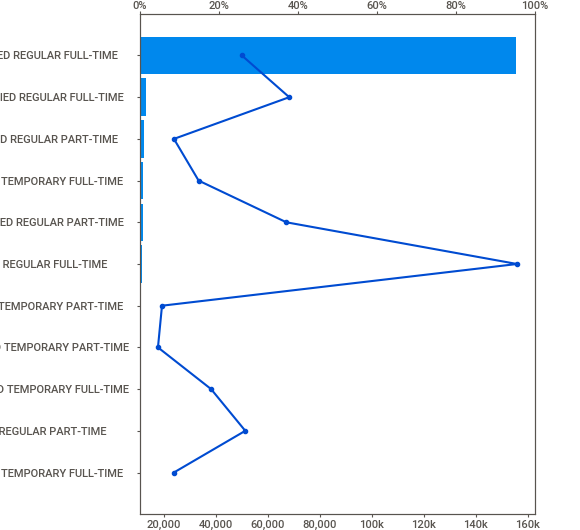
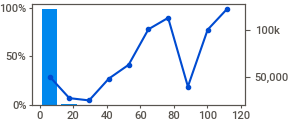
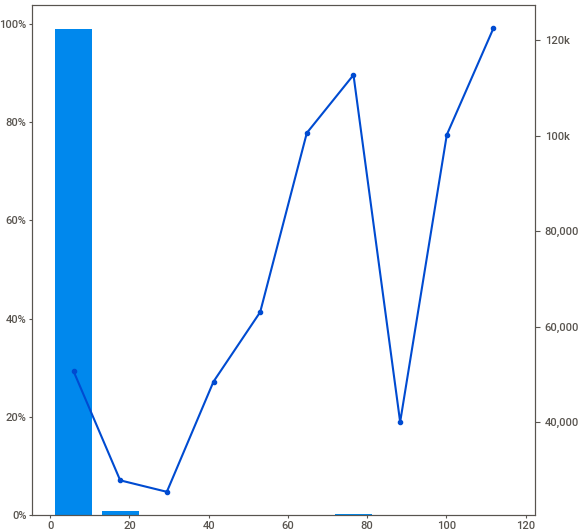
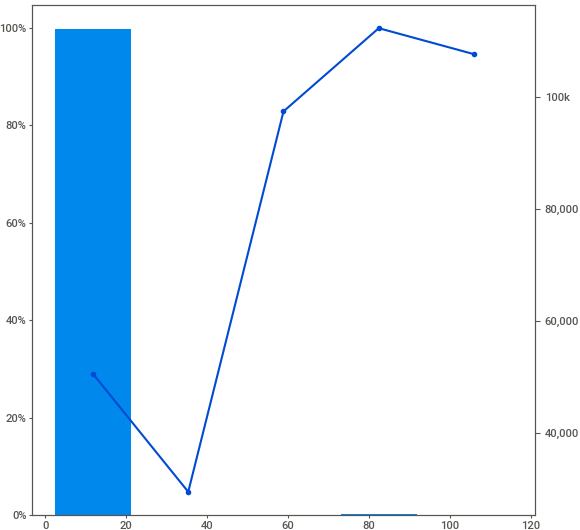
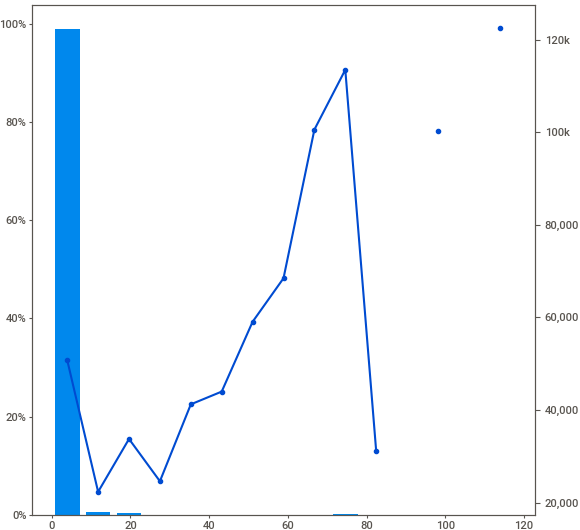
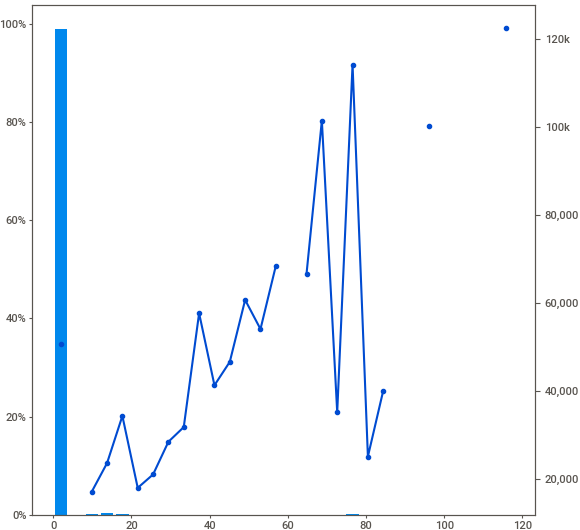
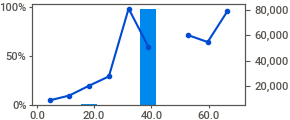
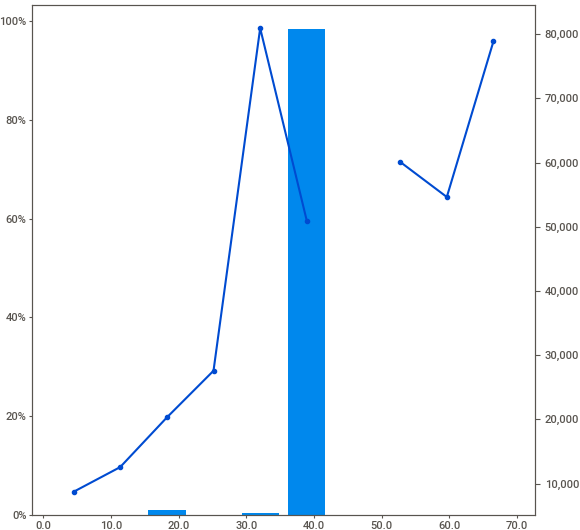
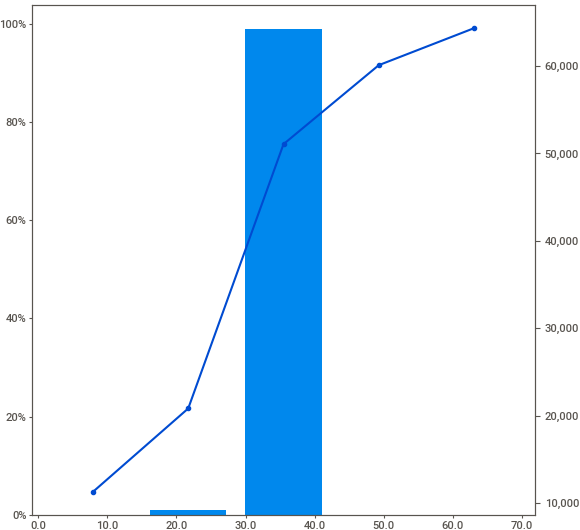
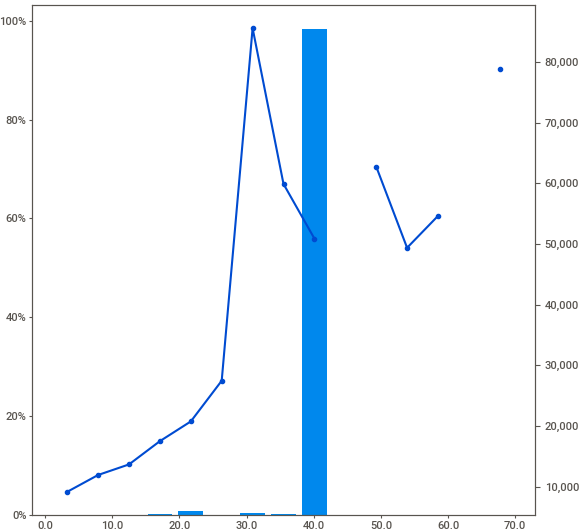
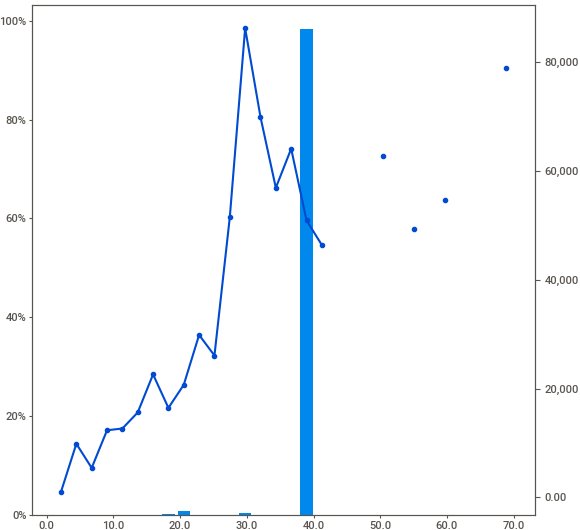
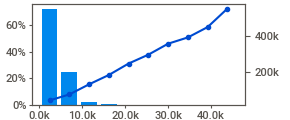
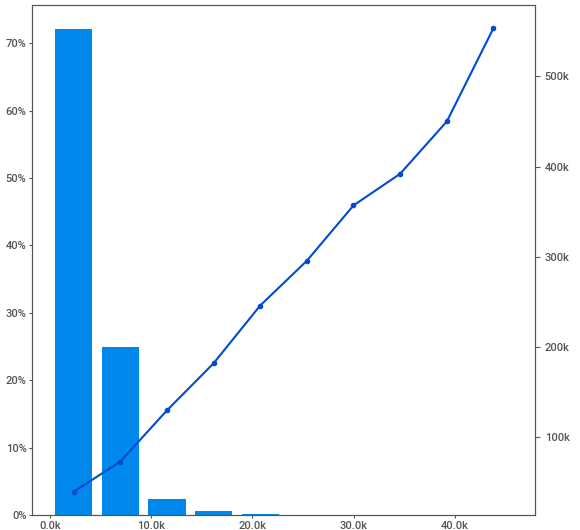
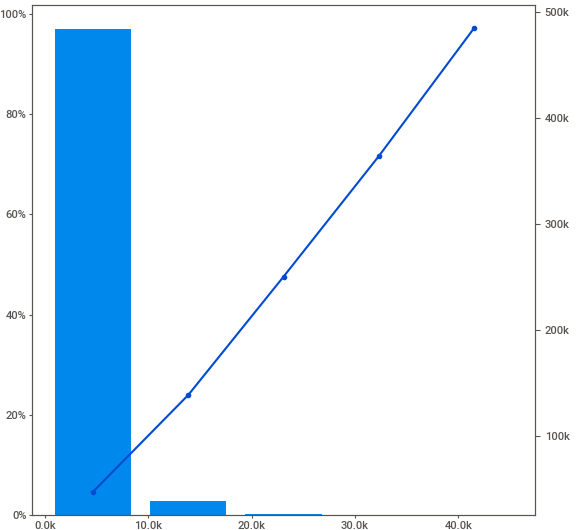
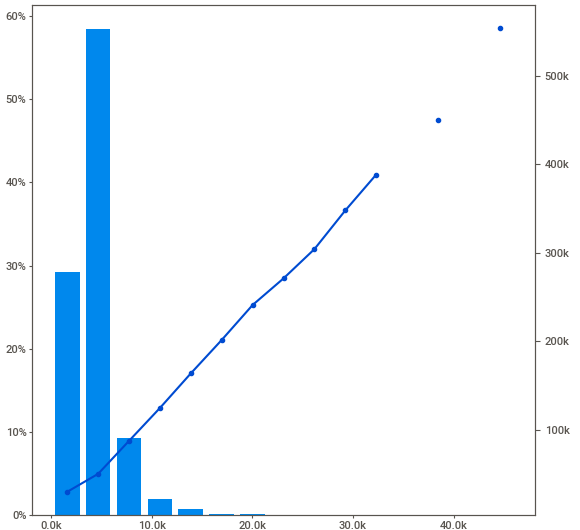
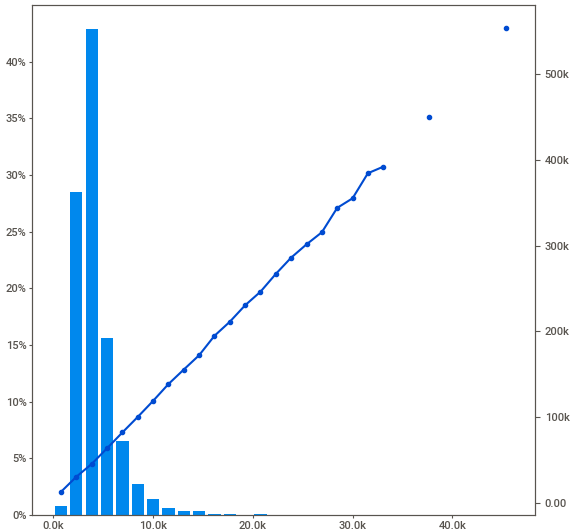
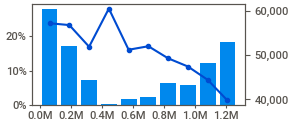
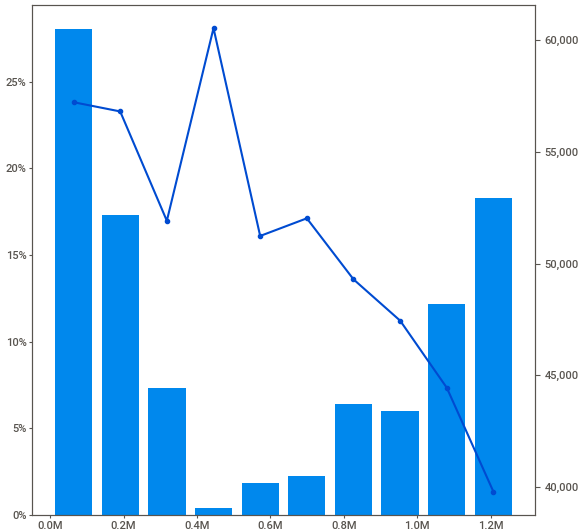
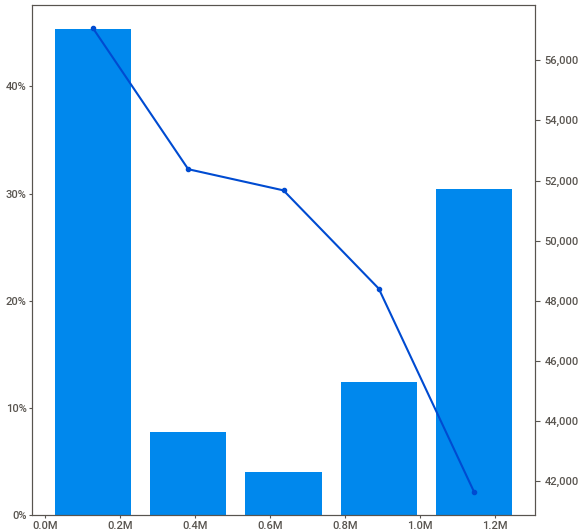
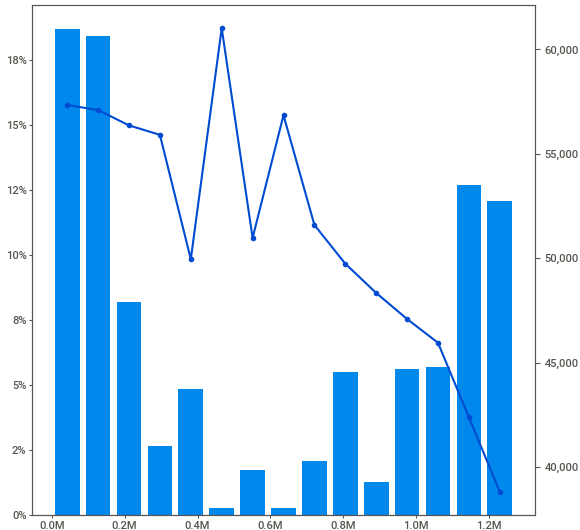
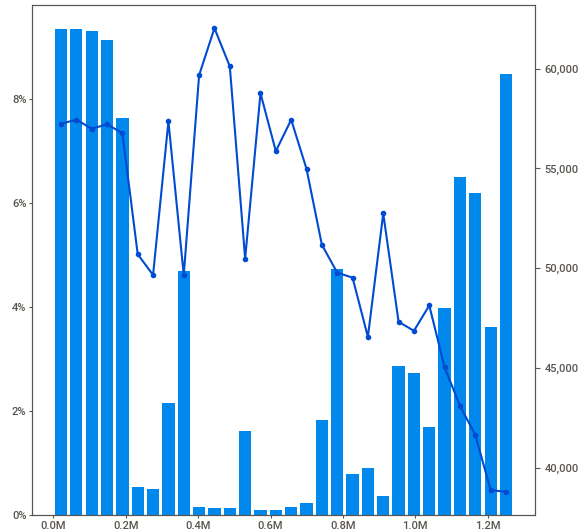
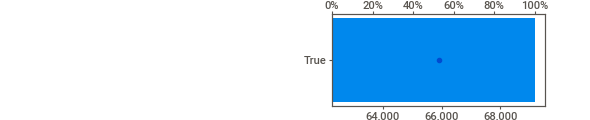
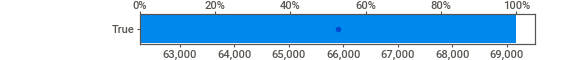
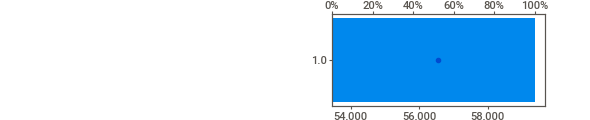
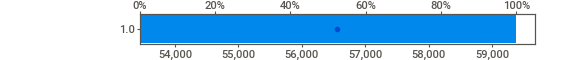
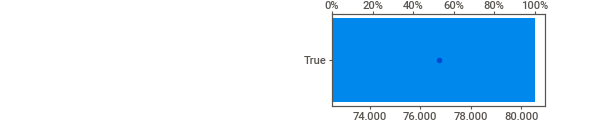
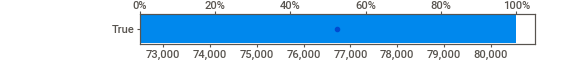
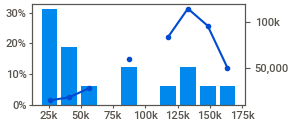
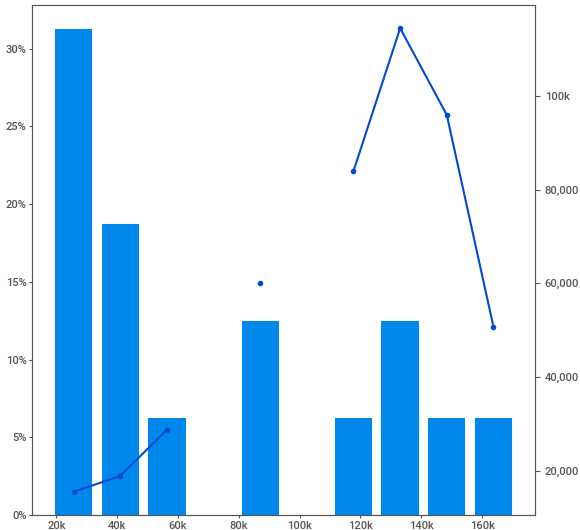
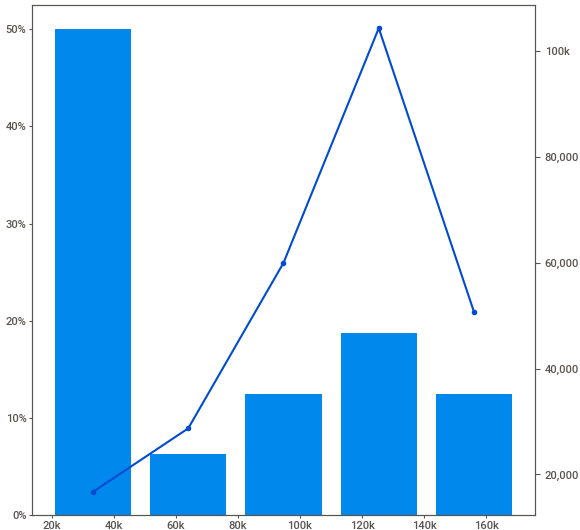
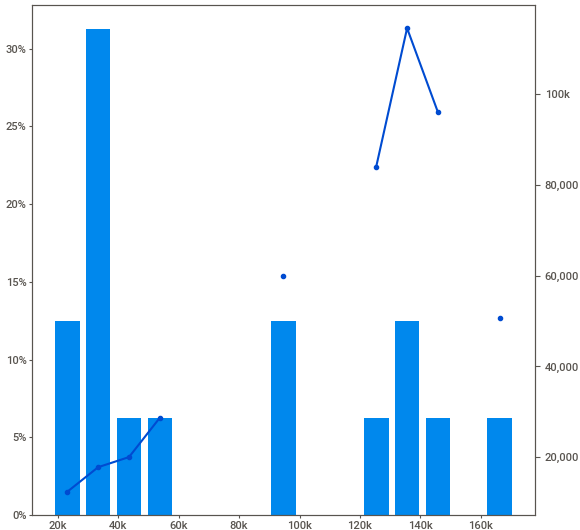
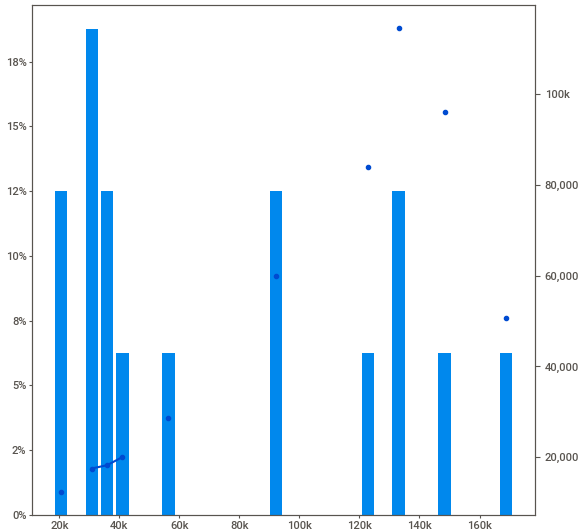
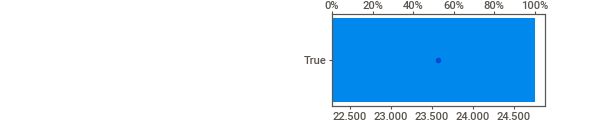
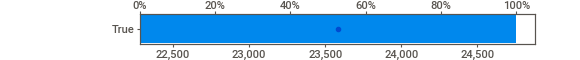
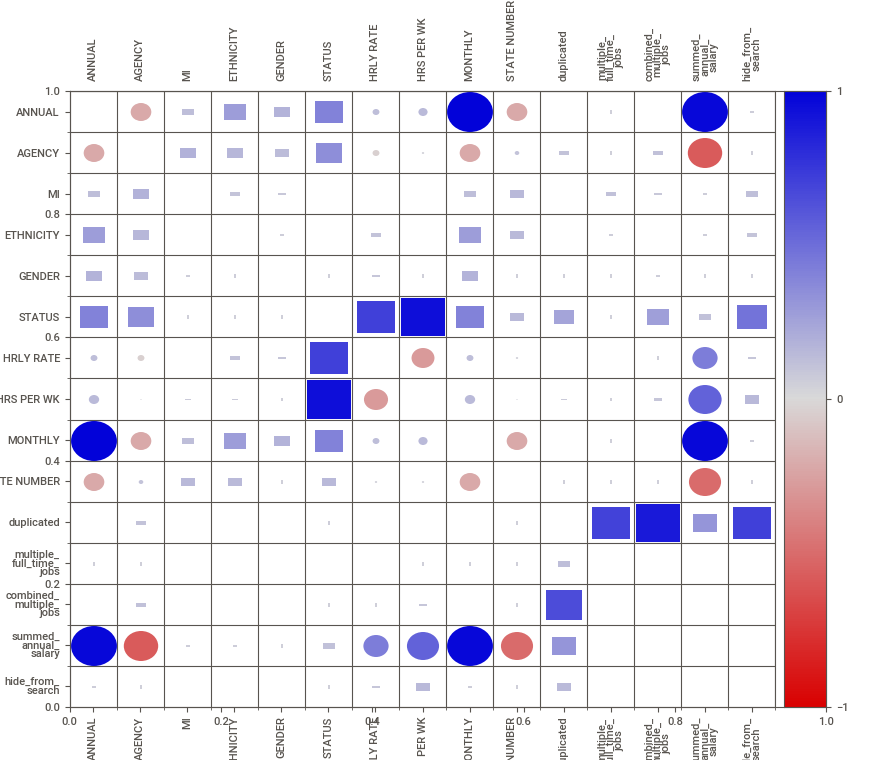
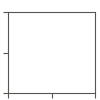

In [44]:
import sweetviz as sv
my_report = sv.analyze(data, target_feat= 'ANNUAL')
my_report.show_notebook(w=880,h=700,layout='vertical', scale=0.8)

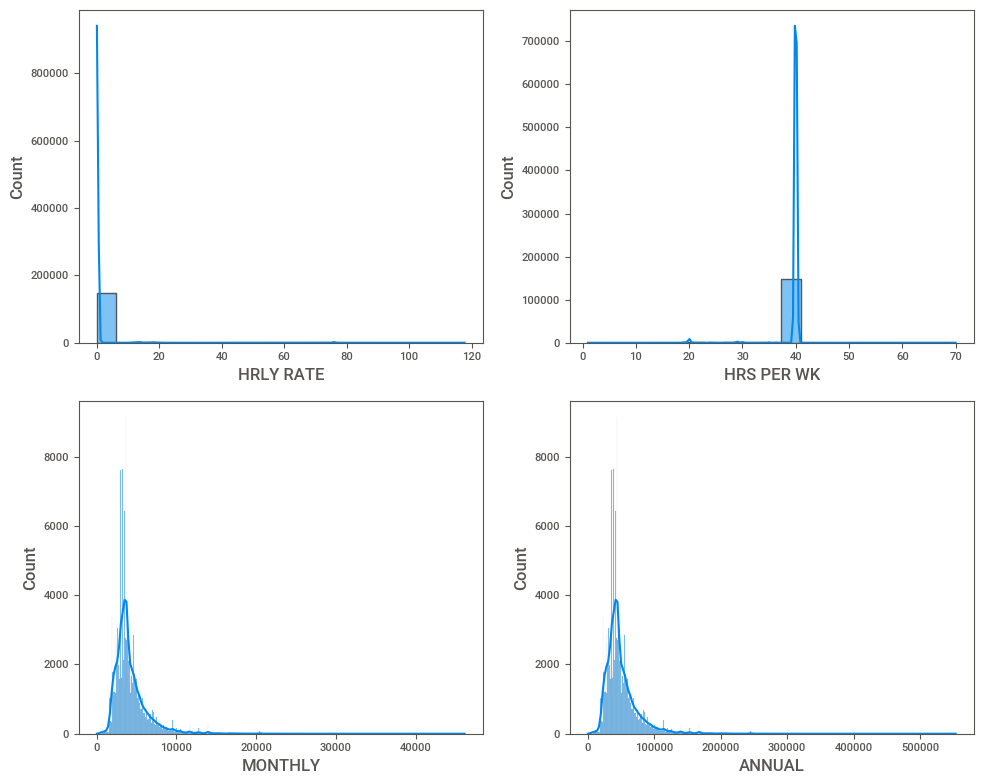

In [45]:
plt.figure(figsize=(10,8))
plot=1

for i in data[['HRLY RATE','HRS PER WK','MONTHLY','ANNUAL']]:
    plt.subplot(2,2,plot)
    sns.histplot(x=data[i],kde=True)
    plt.xlabel(i)
    plot+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='MONTHLY', ylabel='STATUS'>

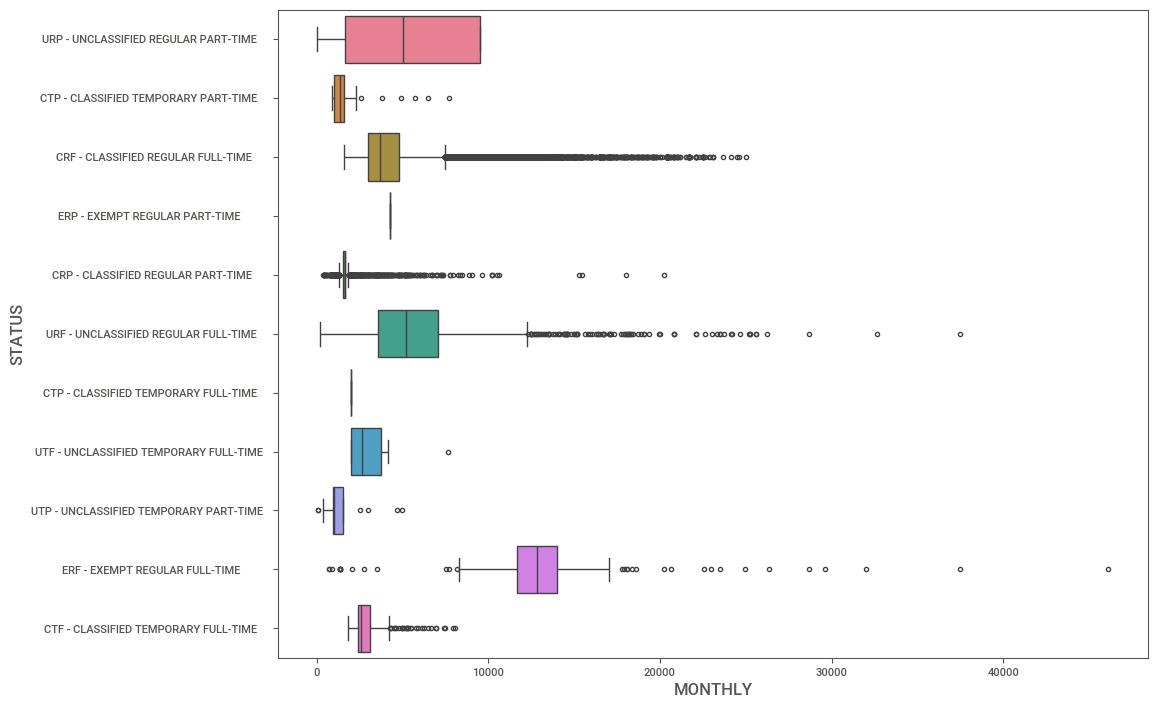

In [46]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data["MONTHLY"], y=data["STATUS"], hue=data["STATUS"])

In [ ]:
# ERF (EXEMPT REGULAR FULL-TIME): This category exhibits the highest proportion of distinct outlier instances in the dataset.

# URF (UNCLASSIFIED REGULAR FULL-TIME): This category also demonstrates a relatively high percentage of outliers, though lower than that observed in ERF.

<Axes: xlabel='MONTHLY', ylabel='STATUS'>

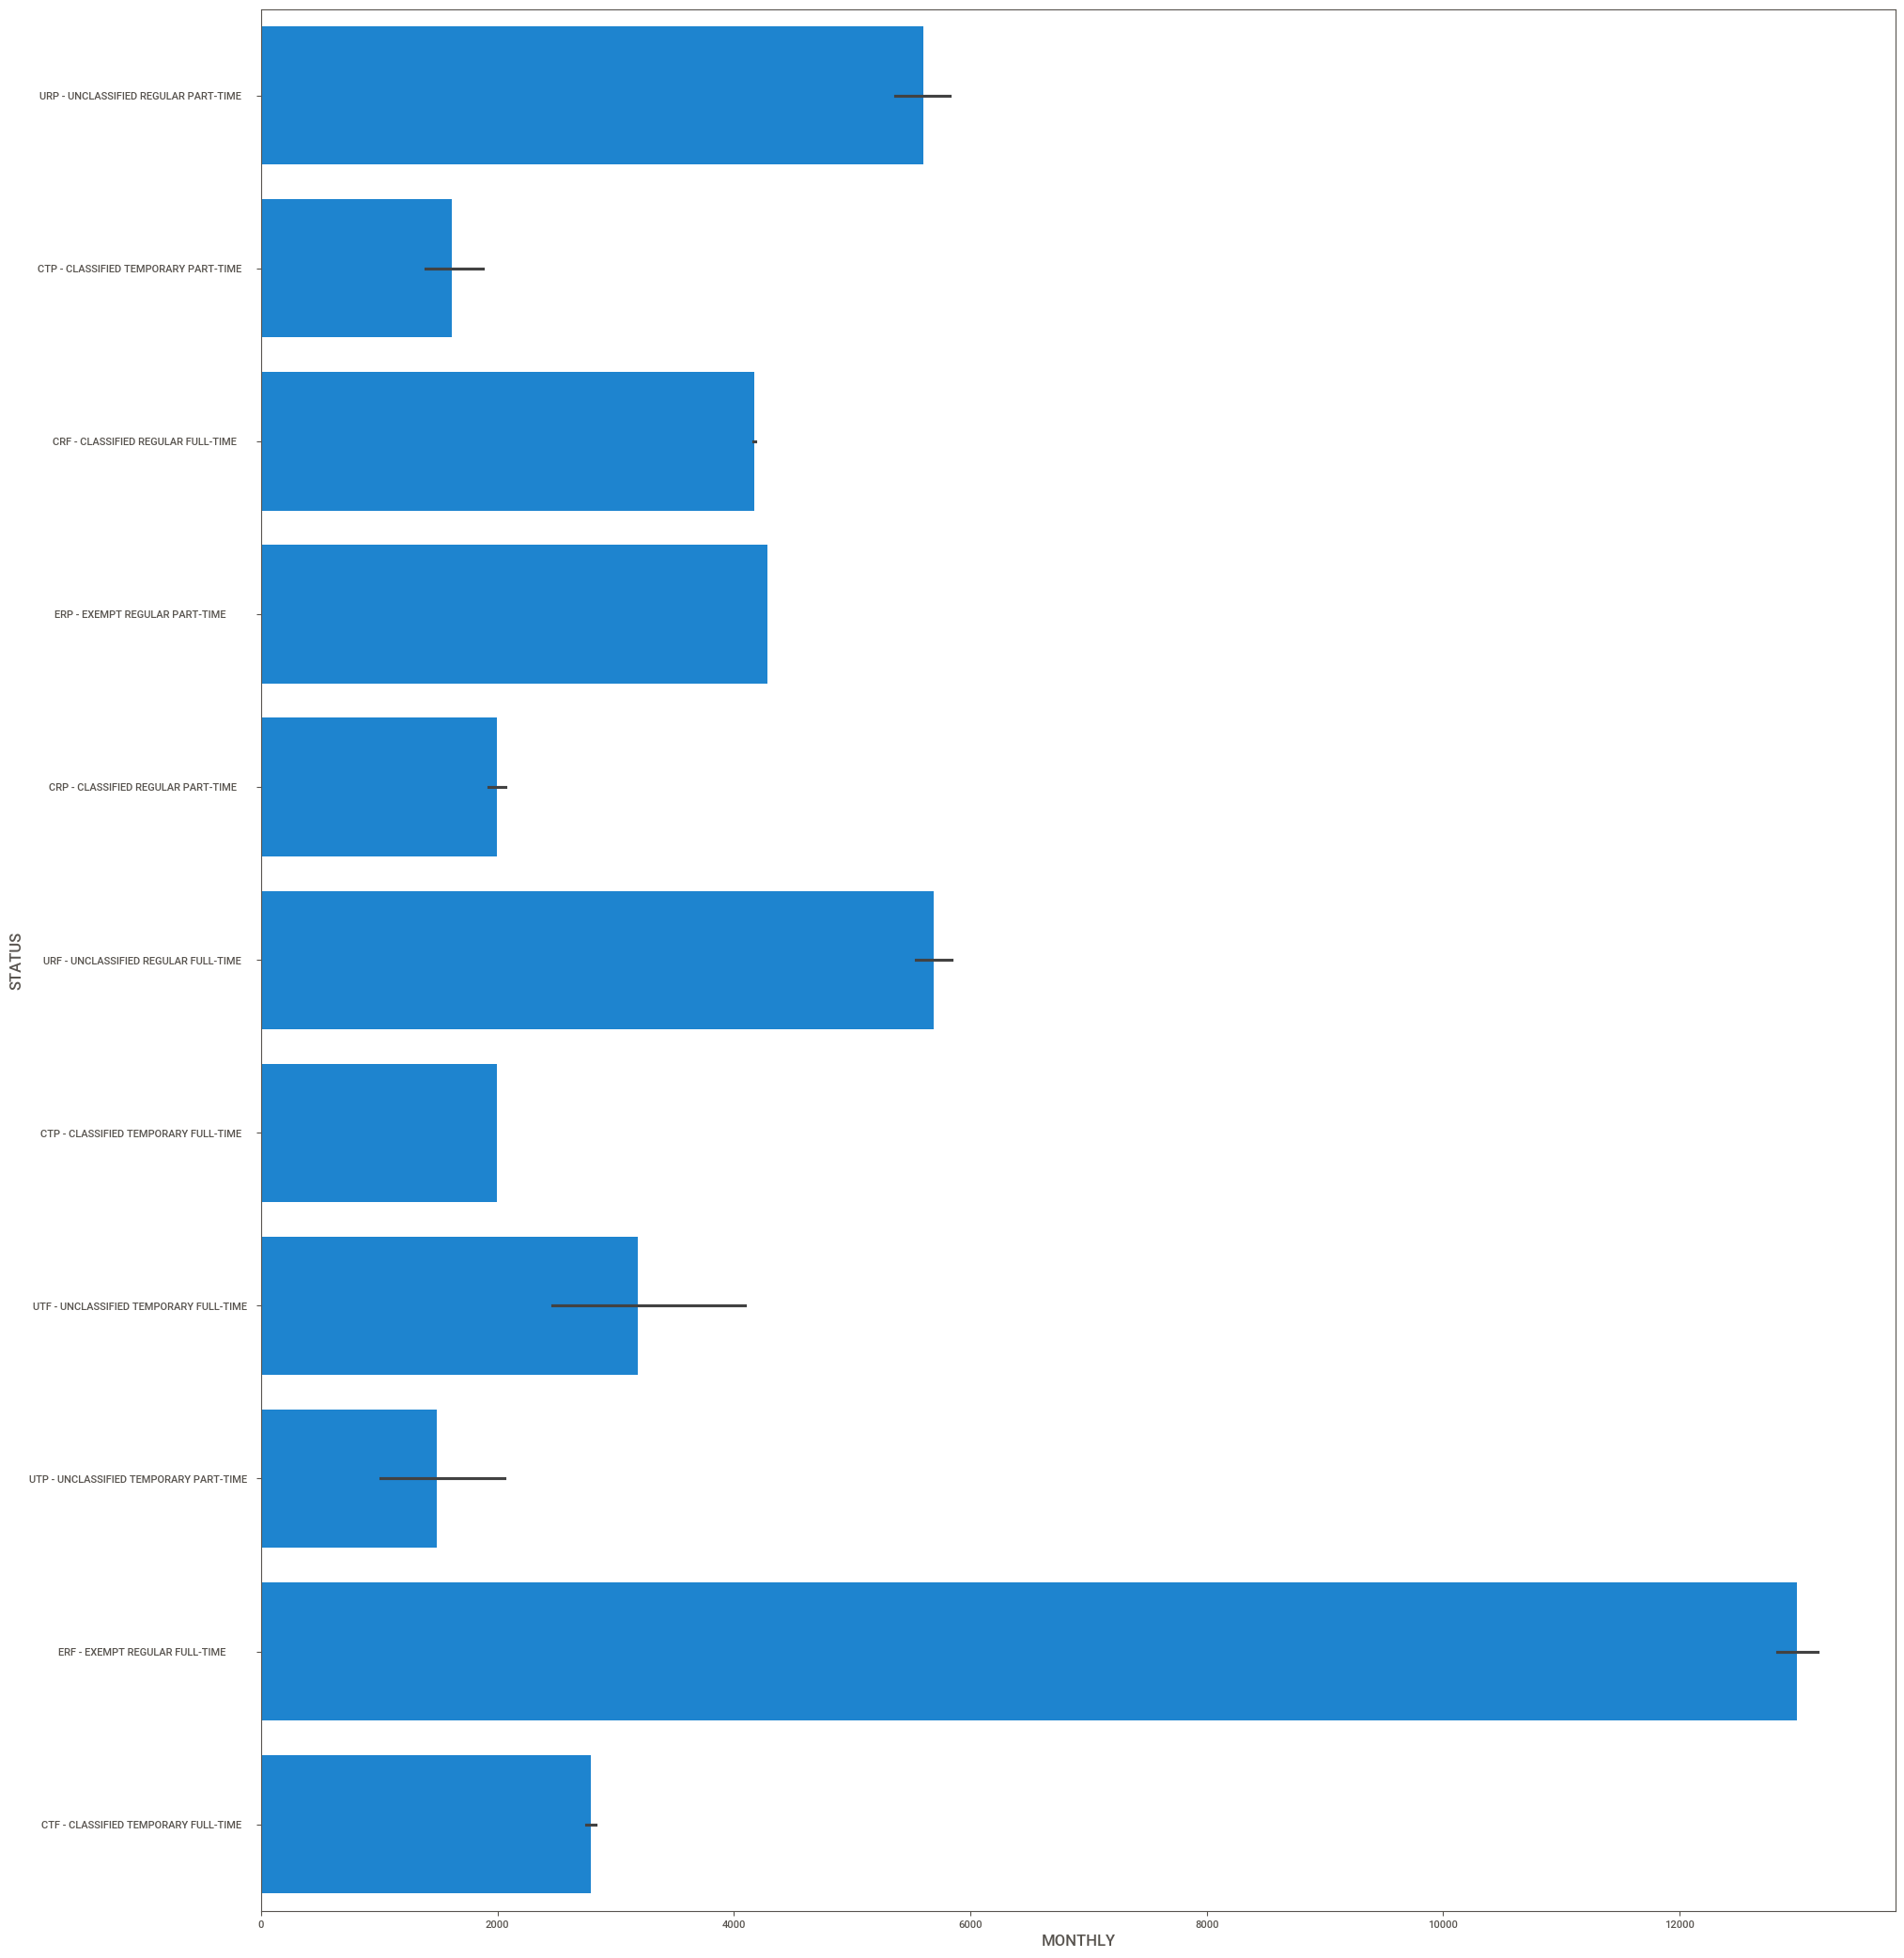

In [47]:
plt.figure(figsize=(20,25))
sns.barplot(x=data["MONTHLY"],y=data["STATUS"])

In [ ]:
# URP has the highest values among part-time categories.
# Temporary and part-time groups (UTP, CTP, CRP) show much lower values comparatively.
# ERF stands out with a very high monthly value ($12k+) compared to others.
# This suggests that exempt regular full-time employees earn significantly more monthly compared to temporary or part-time groups.

<Axes: xlabel='MONTHLY', ylabel='AGENCY NAME'>

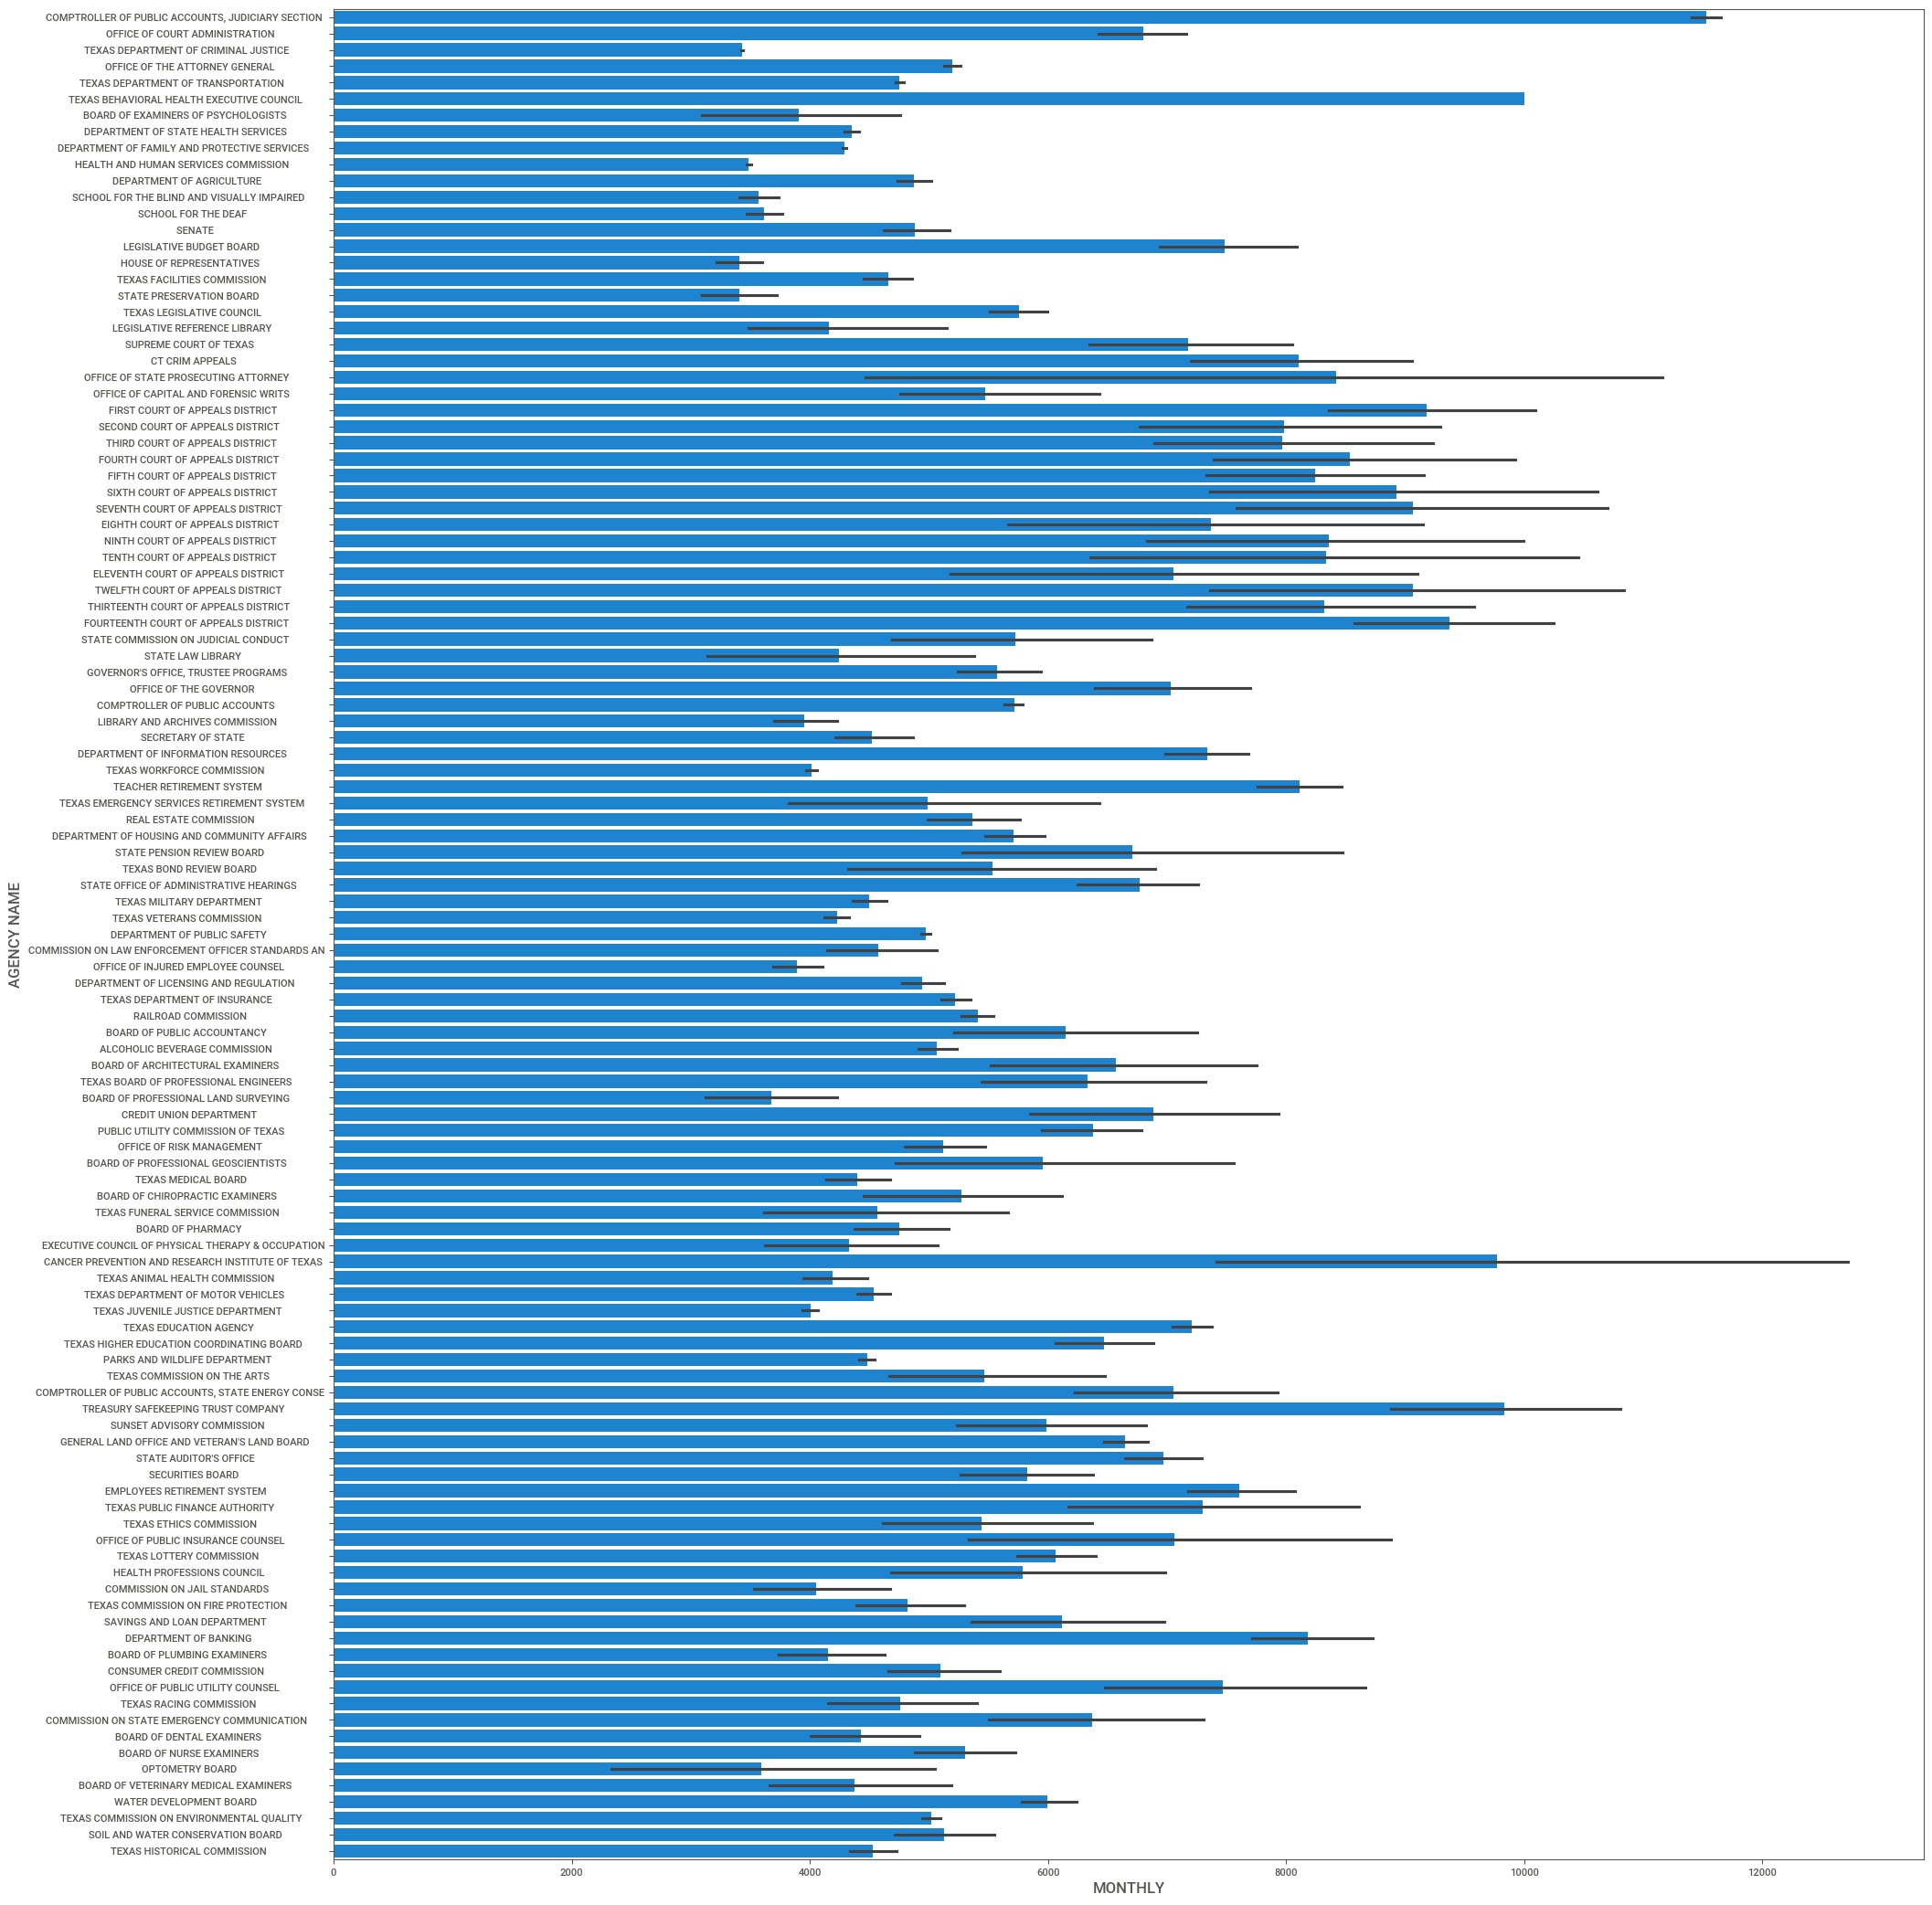

In [64]:
plt.figure(figsize=(20,25))
sns.barplot(x=data["MONTHLY"],y=data["AGENCY NAME"])

<function matplotlib.pyplot.show(close=None, block=None)>

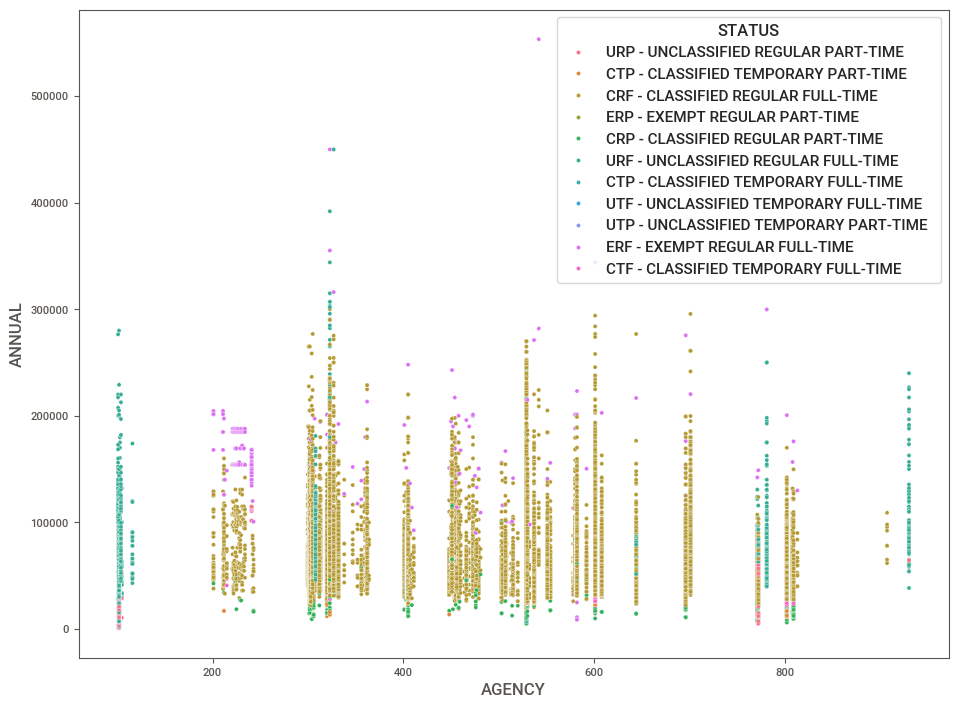

In [65]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='AGENCY', y='ANNUAL', data=data, hue='STATUS')
plt.show

In [ ]:
# Each point represents an employee’s annual salary (ANNUAL) plotted against their agency code (AGENCY).

# Salaries are spread across agencies, but a major concentration lies below $150,000 annually.

# A few employees in some agencies earn very high salaries ($300K+ outliers), showing strong salary disparities.

# This confirms that salary distribution is not uniform across agencies because some departments have wider pay ranges than others.

# Employment status categories (URP, CTP, CRF, ERF, etc.) have different salary levels and spreads.

# ERF (Exempt Regular Full-Time) and URF (Unclassified Regular Full-Time) shows the highest outliers (above $400K).

# Part-time and temporary statuses (URP, CTP, UTP) mostly cluster at the lower salary levels, indicating predictable wage differences.

# CRF (Classified Regular Full-Time) has a broad middle-range spread but fewer extreme outliers compared to ERF/URF.

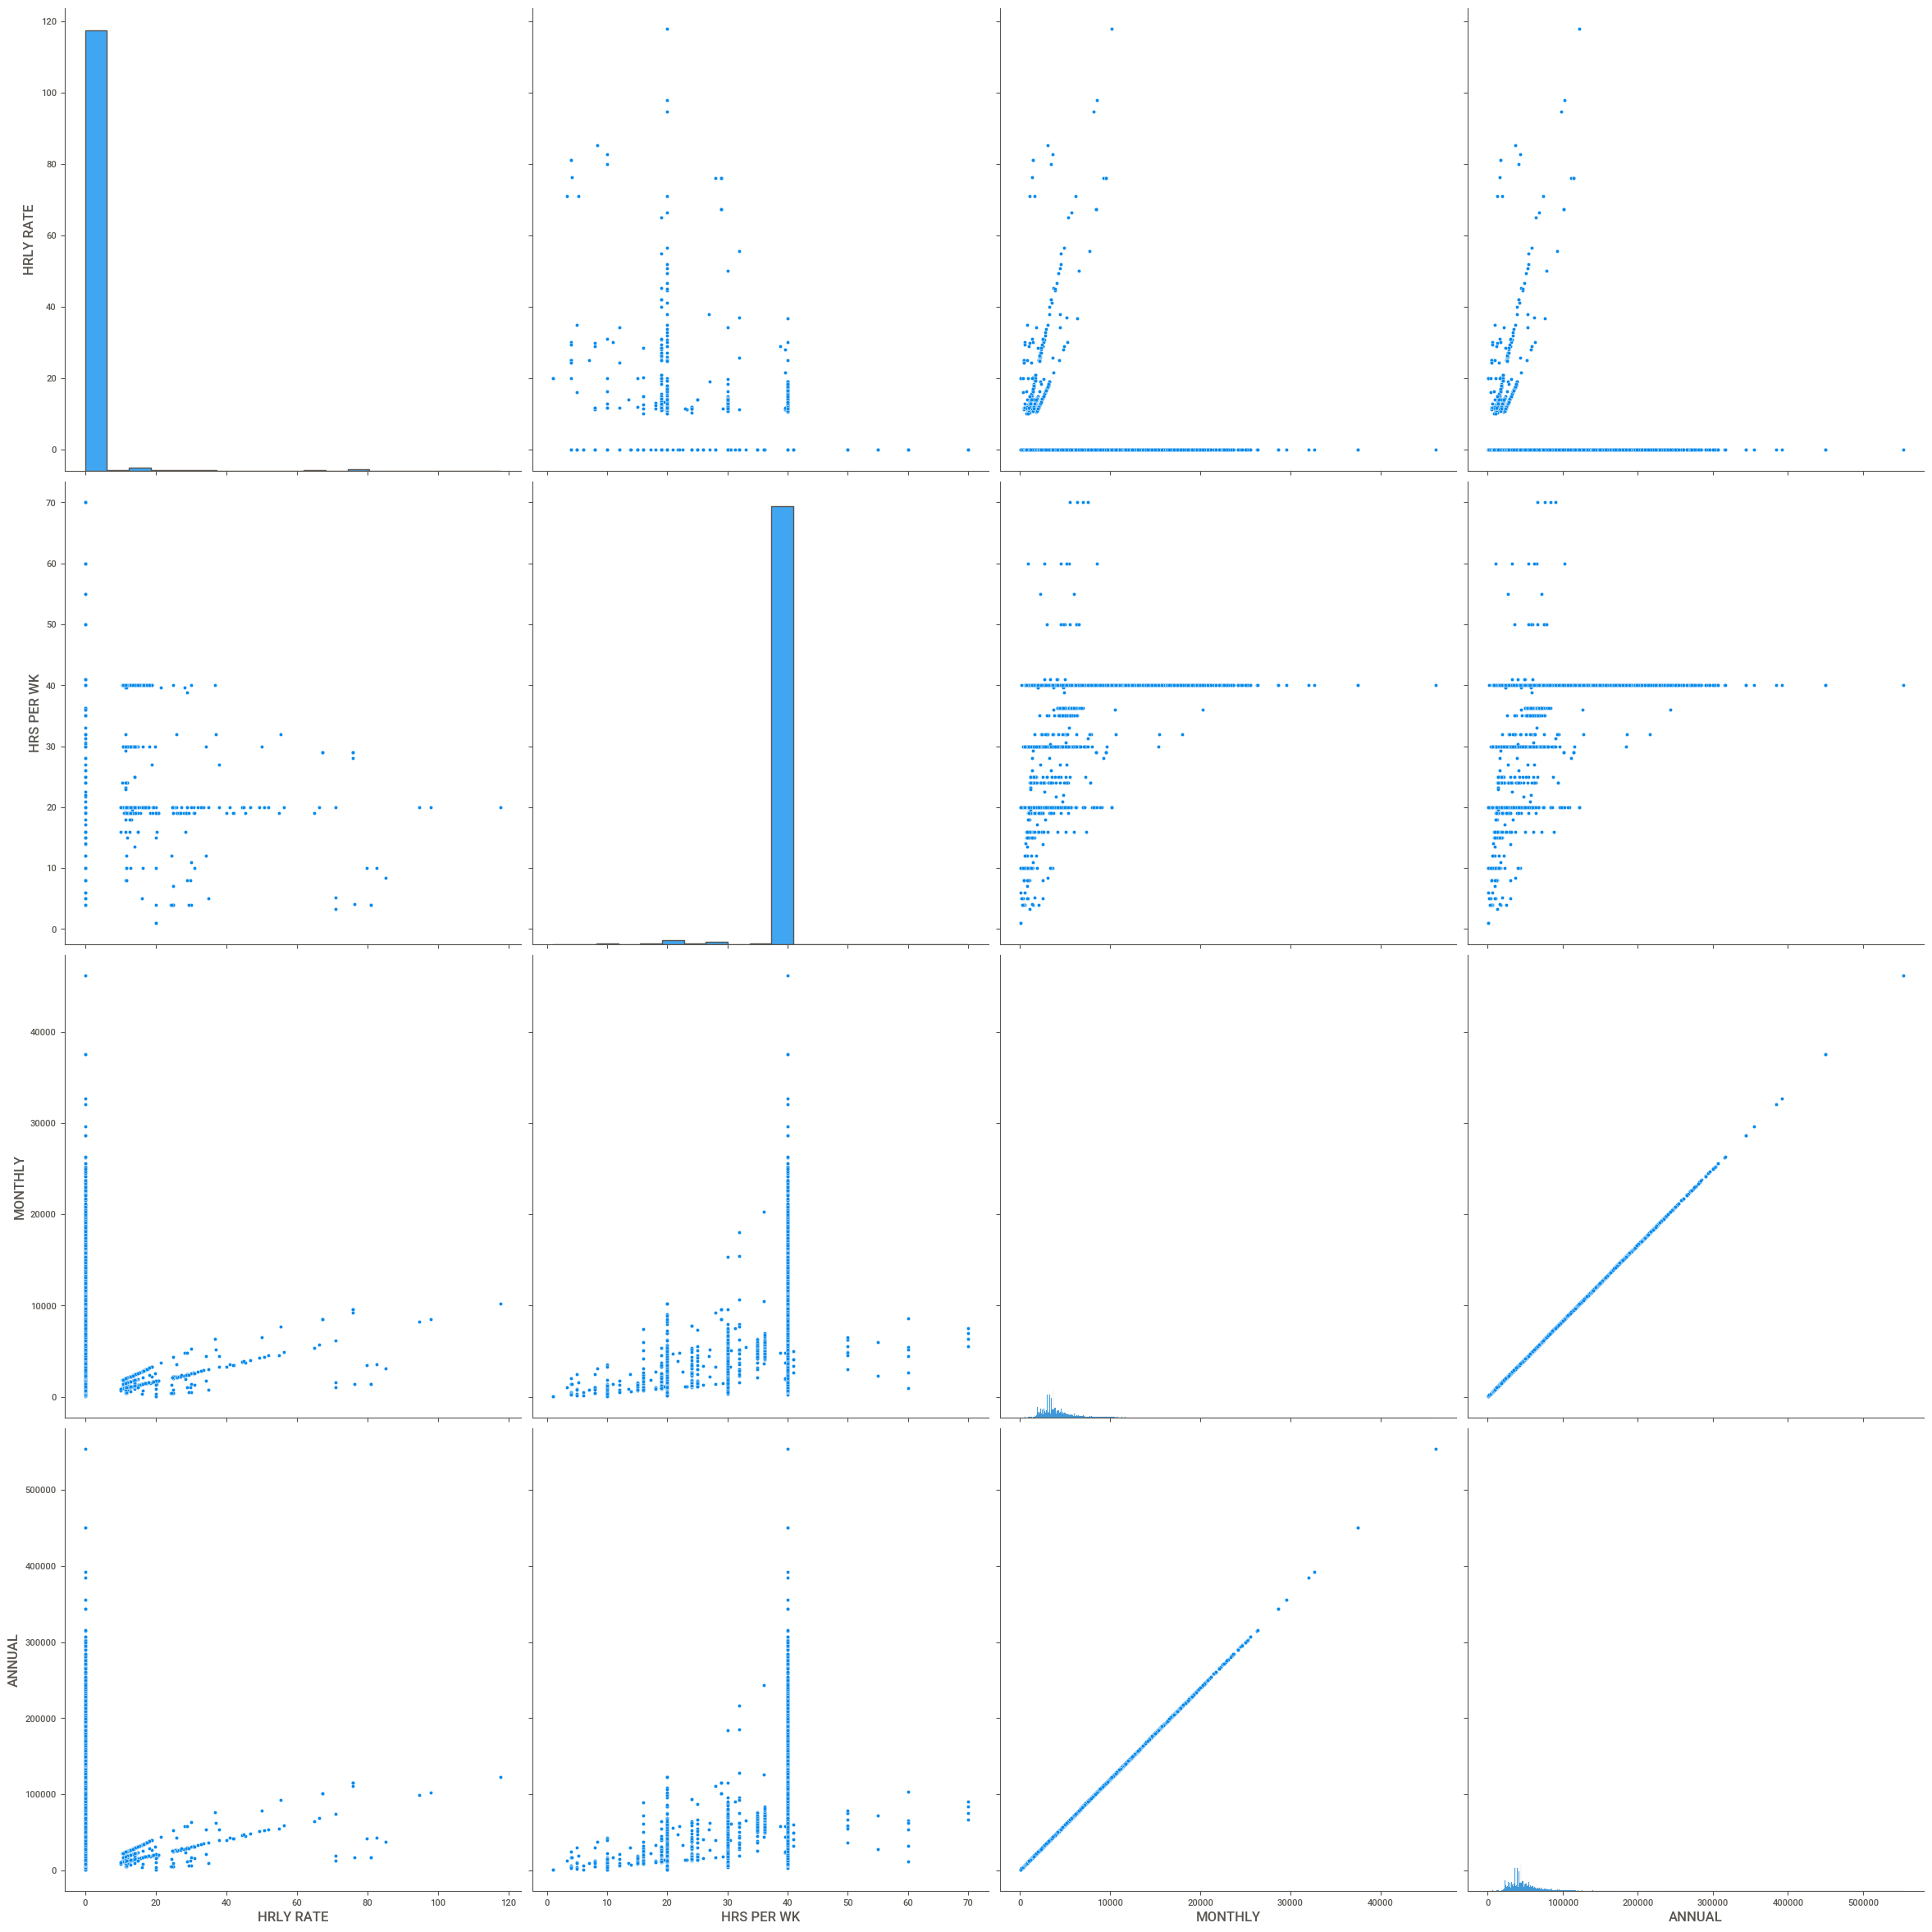

In [67]:
sns.pairplot(data[['HRLY RATE','HRS PER WK','MONTHLY','ANNUAL']], size=6)

## Data Preprocessing
Steps include:
1. Check for constant columns (drop)
2. Check for unique columns (drop)
3. Check for missing values, if any (replace/drop)
4. Duplicates in the data (drop)
5. Outlier handling (replace/remove)
6. Encoding 
7. Scaling (Normalization/Standardization)

In [170]:
# Constant columns --> when std() of a column is 0 and when unique value of a categorical column is 1. 
data.drop(["multiple_full_time_jobs","duplicated","combined_multiple_jobs","hide_from_search"],axis=1,inplace=True)

In [172]:
# Unique columns --> Unique columns usually have no significance in the data
data.drop(["STATE NUMBER"],axis=1,inplace=True)

In [174]:
# Missing values
data.isnull().sum()

AGENCY                       0
AGENCY NAME                  0
LAST NAME                    0
FIRST NAME                   0
MI                           0
CLASS CODE                   0
CLASS TITLE                  0
ETHNICITY                    0
GENDER                       0
STATUS                       0
EMPLOY DATE                  0
HRLY RATE                    0
HRS PER WK                   0
MONTHLY                      0
ANNUAL                       0
summed_annual_salary    149465
dtype: int64

In [176]:
# Reason : 99% of the values are missing from the feature column, therefore, it can be removed for further analysis.
data.drop(["summed_annual_salary"],axis=1,inplace=True)

In [178]:
data.isnull().sum()

AGENCY         0
AGENCY NAME    0
LAST NAME      0
FIRST NAME     0
MI             0
CLASS CODE     0
CLASS TITLE    0
ETHNICITY      0
GENDER         0
STATUS         0
EMPLOY DATE    0
HRLY RATE      0
HRS PER WK     0
MONTHLY        0
ANNUAL         0
dtype: int64

In [180]:
# Duplicates
data.duplicated().sum()

0

In [182]:
# Correcting inconsistent date formats
data['EMPLOY DATE'] = pd.to_datetime(data['EMPLOY DATE'], errors='coerce')

<Axes: xlabel='ANNUAL'>

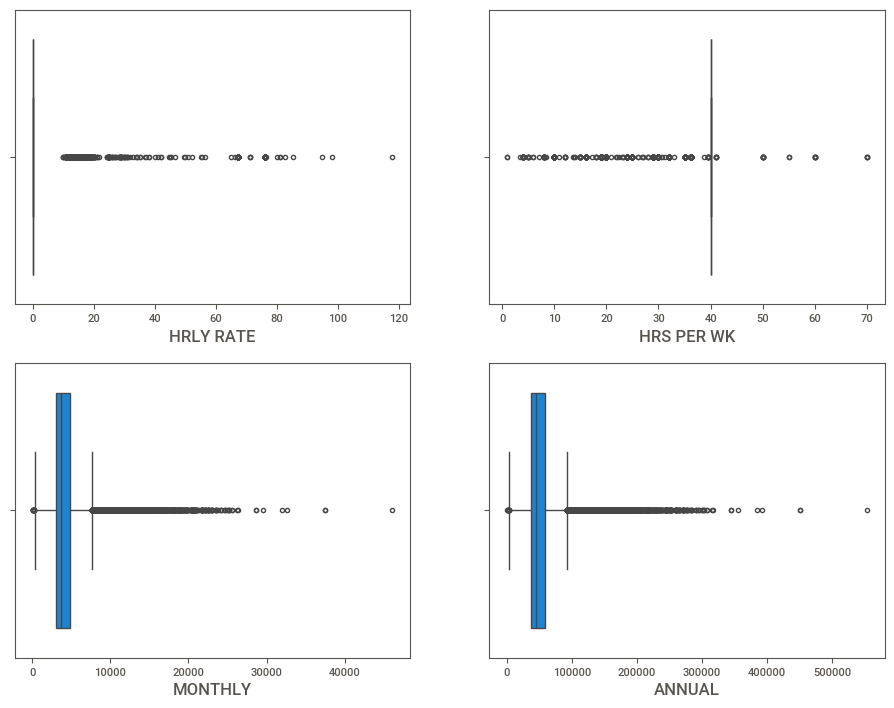

In [183]:
# Outlier Analysis
fig, ax = plt.subplots(2,2, figsize= (10,8))
sns.boxplot(data['HRLY RATE'], ax= ax[0,0], orient='h')
sns.boxplot(data['HRS PER WK'], ax= ax[0,1], orient='h')
sns.boxplot(data['MONTHLY'], ax= ax[1,0], orient='h')
sns.boxplot(data['ANNUAL'], ax= ax[1,1], orient='h')

In [184]:
# Defining a function to remove outliers from the data
def iqr_method(x):
    q1 = data[x].quantile(0.25)
    q3 = data[x].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

In [185]:
lower_annual, upper_annual = iqr_method('ANNUAL')
print(f"Lower limit : {lower_annual} \nUpper limit : {upper_annual}")

Lower limit : 3010.6200000000026 
Upper limit : 91617.18


#### **Task 1 : Outliers in Salaries**

In [186]:
outliers= data[(data['ANNUAL'] > upper_annual) | (data['ANNUAL'] < lower_annual)]['CLASS TITLE'].unique()

In [187]:
outliers.tolist() #outliers

['JUDGE, RETIRED                                    ',
 'DIRECTOR IV                                       ',
 'LEG. OFFICIAL/ADMINISTRATOR                       ',
 'LEGISLATIVE PROFESSIONAL                          ',
 'COMMITTEE DIRECTOR                                ',
 'ELECTED OFFICIALS STAFF                           ',
 'DIRECTOR II                                       ',
 'PROGRAM SUPERVISOR VII                            ',
 'DIRECTOR VI                                       ',
 'MGR V                                             ',
 'DIRECTOR V                                        ',
 'ARCHITECT IV                                      ',
 'SPECIAL COUNSEL                                   ',
 'MGR, COMPUTER SUPPORT CENTER                      ',
 'EXEC DIRECTOR                                     ',
 'DEPUTY DIR, LEGAL                                 ',
 'PROGRAMMER V                                      ',
 'LEG COUN IV                                       ',
 'SR LEG C

In [ ]:
# These outliers are mainly high-paid executives, directors, judges.

In [194]:
len(data.loc[data["ANNUAL"] > upper_annual])/len(data)*100 # % of outliers < 5%

6.0328737431513035

In [196]:
len(data.loc[data["ANNUAL"] < lower_annual])/len(data)*100

0.008696757447434792

In [198]:
data.loc[data["ANNUAL"] < lower_annual]

AGENCY                     AGENCY NAME                      \
141394    101   SENATE                                               
141415    101   SENATE                                               
141808    102   HOUSE OF REPRESENTATIVES                             
141809    102   HOUSE OF REPRESENTATIVES                             
141897    102   HOUSE OF REPRESENTATIVES                             
141901    102   HOUSE OF REPRESENTATIVES                             
142033    102   HOUSE OF REPRESENTATIVES                             
142067    102   HOUSE OF REPRESENTATIVES                             
142114    102   HOUSE OF REPRESENTATIVES                             
142205    102   HOUSE OF REPRESENTATIVES                             
142282    102   HOUSE OF REPRESENTATIVES                             
142311    102   HOUSE OF REPRESENTATIVES                             
142316    102   HOUSE OF REPRESENTATIVES                             

                  LAST NAME                       FIRST NAME           MI  \
141394  EDMONDSON                       DOUGLAS                             
141415  FONTENOT                        RACHEAL                         D   
141808  BERNAL                          JESUS                           R   
141809  BHALLA                          RACHEL                          C   
141897  CRUZ JR                         PHILLIP                             
141901  CUTBIRTH                        JOE                             H   
142033  HARRIS                          KATHARINE                       T   
142067  HOUSTON                         DONTE                           D   
142114  KOENIG                          REID                            A   
142205  MITCHELL                        JESSICA                         B   
142282  PETERSON                        BREELY                          K   
142311  REID                            MASON                           H   
142316  REYES                           IRMA                            M   

       CLASS CODE                     CLASS TITLE                      \
141394  7103       LEG. SERVICE/MAINTENANCE                             
141415  7103       LEG. SERVICE/MAINTENANCE                             
141808  7110       ELECTED OFFICIALS STAFF                              
141809  7110       ELECTED OFFICIALS STAFF                              
141897  7110       ELECTED OFFICIALS STAFF                              
141901  7110       ELECTED OFFICIALS STAFF                              
142033  7110       ELECTED OFFICIALS STAFF                              
142067  7110       ELECTED OFFICIALS STAFF                              
142114  7110       ELECTED OFFICIALS STAFF                              
142205  7110       ELECTED OFFICIALS STAFF                              
142282  7110       ELECTED OFFICIALS STAFF                              
142311  7110       ELECTED OFFICIALS STAFF                              
142316  7110       ELECTED OFFICIALS STAFF                              

          ETHNICITY          GENDER       \
141394  WHITE            MALE              
141415  OTHER            FEMALE            
141808  HISPANIC         MALE              
141809  WHITE            FEMALE            
141897  HISPANIC         MALE              
141901  WHITE            MALE              
142033  WHITE            FEMALE            
142067  BLACK            MALE              
142114  WHITE            MALE              
142205  WHITE            FEMALE            
142282  WHITE            FEMALE            
142311  WHITE            MALE              
142316  HISPANIC         FEMALE            

                         STATUS                  EMPLOY DATE  HRLY RATE  \
141394  UTP - UNCLASSIFIED TEMPORARY PART-TIME    2005-02-03    20.0      
141415  UTP - UNCLASSIFIED TEMPORARY PART-TIME    2019-12-04    20.0      
141808  URP - UNCLASSIFIED REGULAR PART-TIME      2017-04-12     0.0      
141809  

In [200]:
data.loc[data["ANNUAL"] < lower_annual, "ANNUAL"] = data["ANNUAL"].median()

In [202]:
data.loc[data["ANNUAL"] < lower_annual]

Empty DataFrame
Columns: [AGENCY, AGENCY NAME, LAST NAME, FIRST NAME, MI, CLASS CODE, CLASS TITLE, ETHNICITY, GENDER, STATUS, EMPLOY DATE, HRLY RATE, HRS PER WK, MONTHLY, ANNUAL]
Index: []

In [204]:
lower_monthly, upper_monthly = iqr_method('MONTHLY')
print(f"Lower limit : {lower_monthly} \nUpper limit : {upper_monthly}")

Lower limit : 250.88499999999976 
Upper limit : 7634.765000000001


In [206]:
print(len(data.loc[data["MONTHLY"] > upper_monthly])/len(data)*100)
print(len(data.loc[data["MONTHLY"] < lower_monthly])/len(data)*100)

6.0328737431513035
0.008696757447434792


In [208]:
data.loc[data["MONTHLY"] < lower_monthly, "MONTHLY"] = data["MONTHLY"].median()

In [210]:
data.loc[data["MONTHLY"] < lower_monthly]

Empty DataFrame
Columns: [AGENCY, AGENCY NAME, LAST NAME, FIRST NAME, MI, CLASS CODE, CLASS TITLE, ETHNICITY, GENDER, STATUS, EMPLOY DATE, HRLY RATE, HRS PER WK, MONTHLY, ANNUAL]
Index: []

#### **Task 2 : Biggest wage disparities**

In [106]:
data.pivot_table(values = ['MONTHLY'], index = ['AGENCY NAME','CLASS TITLE','STATUS'], aggfunc = 'median')

MONTHLY
AGENCY NAME                                        CLASS TITLE                                        STATUS                                           
ALCOHOLIC BEVERAGE COMMISSION                      ACCOUNTANT I                                       CRF - CLASSIFIED REGULAR FULL-TIME        3250.00
                                                   ACCOUNTANT II                                      CRF - CLASSIFIED REGULAR FULL-TIME        3541.67
                                                   ACCOUNTANT IV                                      CRF - CLASSIFIED REGULAR FULL-TIME        4250.00
                                                   ACCOUNTANT VI                                      CRF - CLASSIFIED REGULAR FULL-TIME        5295.29
                                                   ACCTS EXAM I                                       CRF - CLASSIFIED REGULAR FULL-TIME        3000.00
...                                                                                                                                                 ...
WATER DEVELOPMENT BOARD                            SYSTEMS ANALYST VI                                 CRF - CLASSIFIED REGULAR FULL-TIME        8050.29
                                                   SYSTEMS SUPPORT SPECIALIST II                      CRF - CLASSIFIED REGULAR FULL-TIME        4000.00
                                                   SYSTEMS SUPPORT SPECIALIST III                     CRF - CLASSIFIED REGULAR FULL-TIME        4393.53
                                                   WEB ADMINISTRATOR III                              CRF - CLASSIFIED REGULAR FULL-TIME        6031.76
                                                   WEB ADMINISTRATOR V                                CRF - CLASSIFIED REGULAR FULL-TIME        7264.84

[7700 rows x 1 columns]

In [ ]:
# Departments with the largest gaps had median manager salaries often $60k–$100k higher than staff.
# Departments with highest disparities:
#   Health & Human Services
#   Transportation agencies
#   Judiciary and Legal offices
# Roles with huge disparities:
#   Directors vs. Analysts/Assistants
#   Supervisors vs. Technicians
#   Program Managers vs. Program Coordinators
# Managerial roles had much higher wages compared to regular employees.

#### **Task 3 : Change in Compensations over time**

In [212]:
data['year_of_employment'] = pd.DatetimeIndex(data['EMPLOY DATE']).year

In [214]:
data['years_of_employment'] = 2020 - data['year_of_employment']

In [216]:
data['years_of_employment'] = data['years_of_employment'].clip(lower=0)

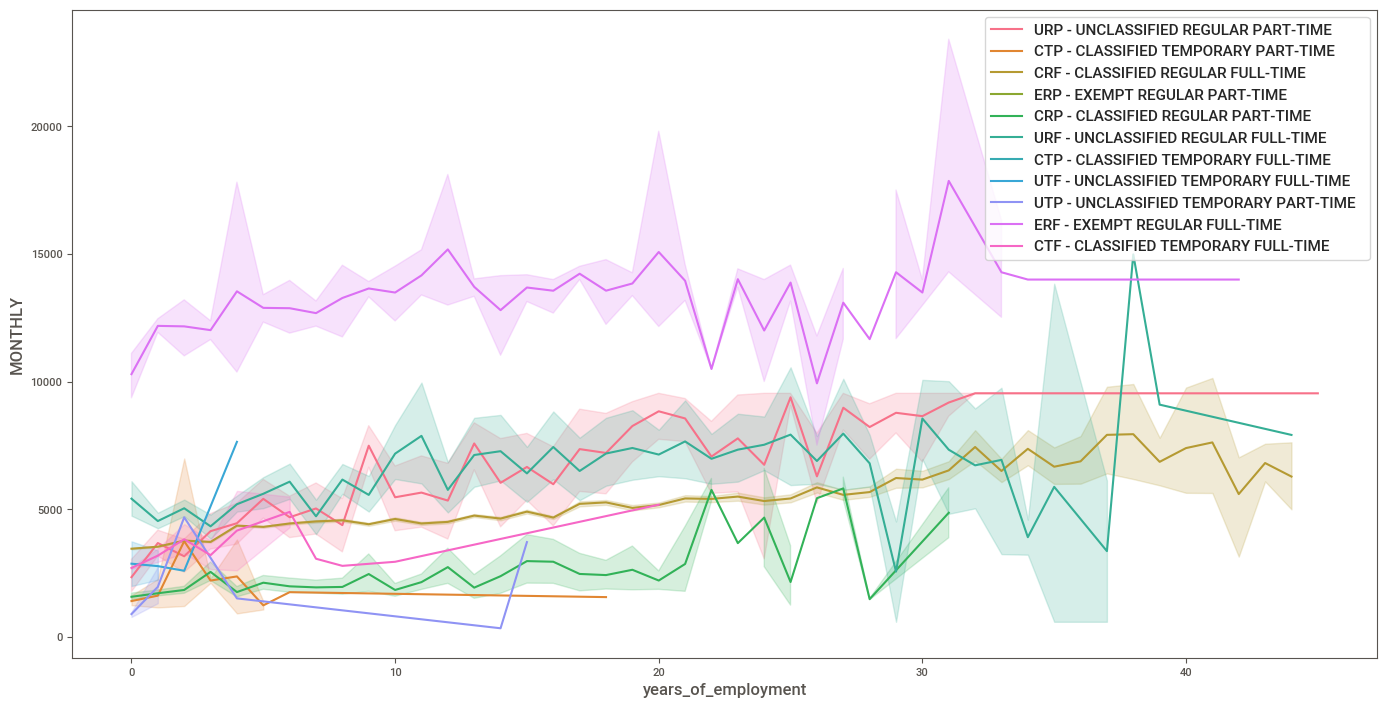

In [218]:
plt.figure(figsize=(15,8))
sns.lineplot(x='years_of_employment', y='MONTHLY',hue ='STATUS', data=data)
plt.legend()
plt.show()

In [ ]:
# Certain roles showed consistent increases in pay.

# Some departments had stagnant or fluctuating wage growth.

# Headcount trends affected compensation (e.g., larger departments had broader wage ranges).

In [219]:
# Encoding
cat_cols = ['AGENCY NAME','LAST NAME','FIRST NAME','MI','CLASS CODE','CLASS TITLE','ETHNICITY','STATUS']
label_enc = LabelEncoder() 
data[cat_cols] = data[cat_cols].apply(label_enc.fit_transform)

In [220]:
# One-Hot Encoding
data = pd.get_dummies(data,columns=["GENDER"],dtype='int',drop_first=True)

## Feature Engineering

In [221]:
# dropping irrelevant columns
data.drop(['year_of_employment','years_of_employment'],axis=1,inplace=True)

<Axes: >

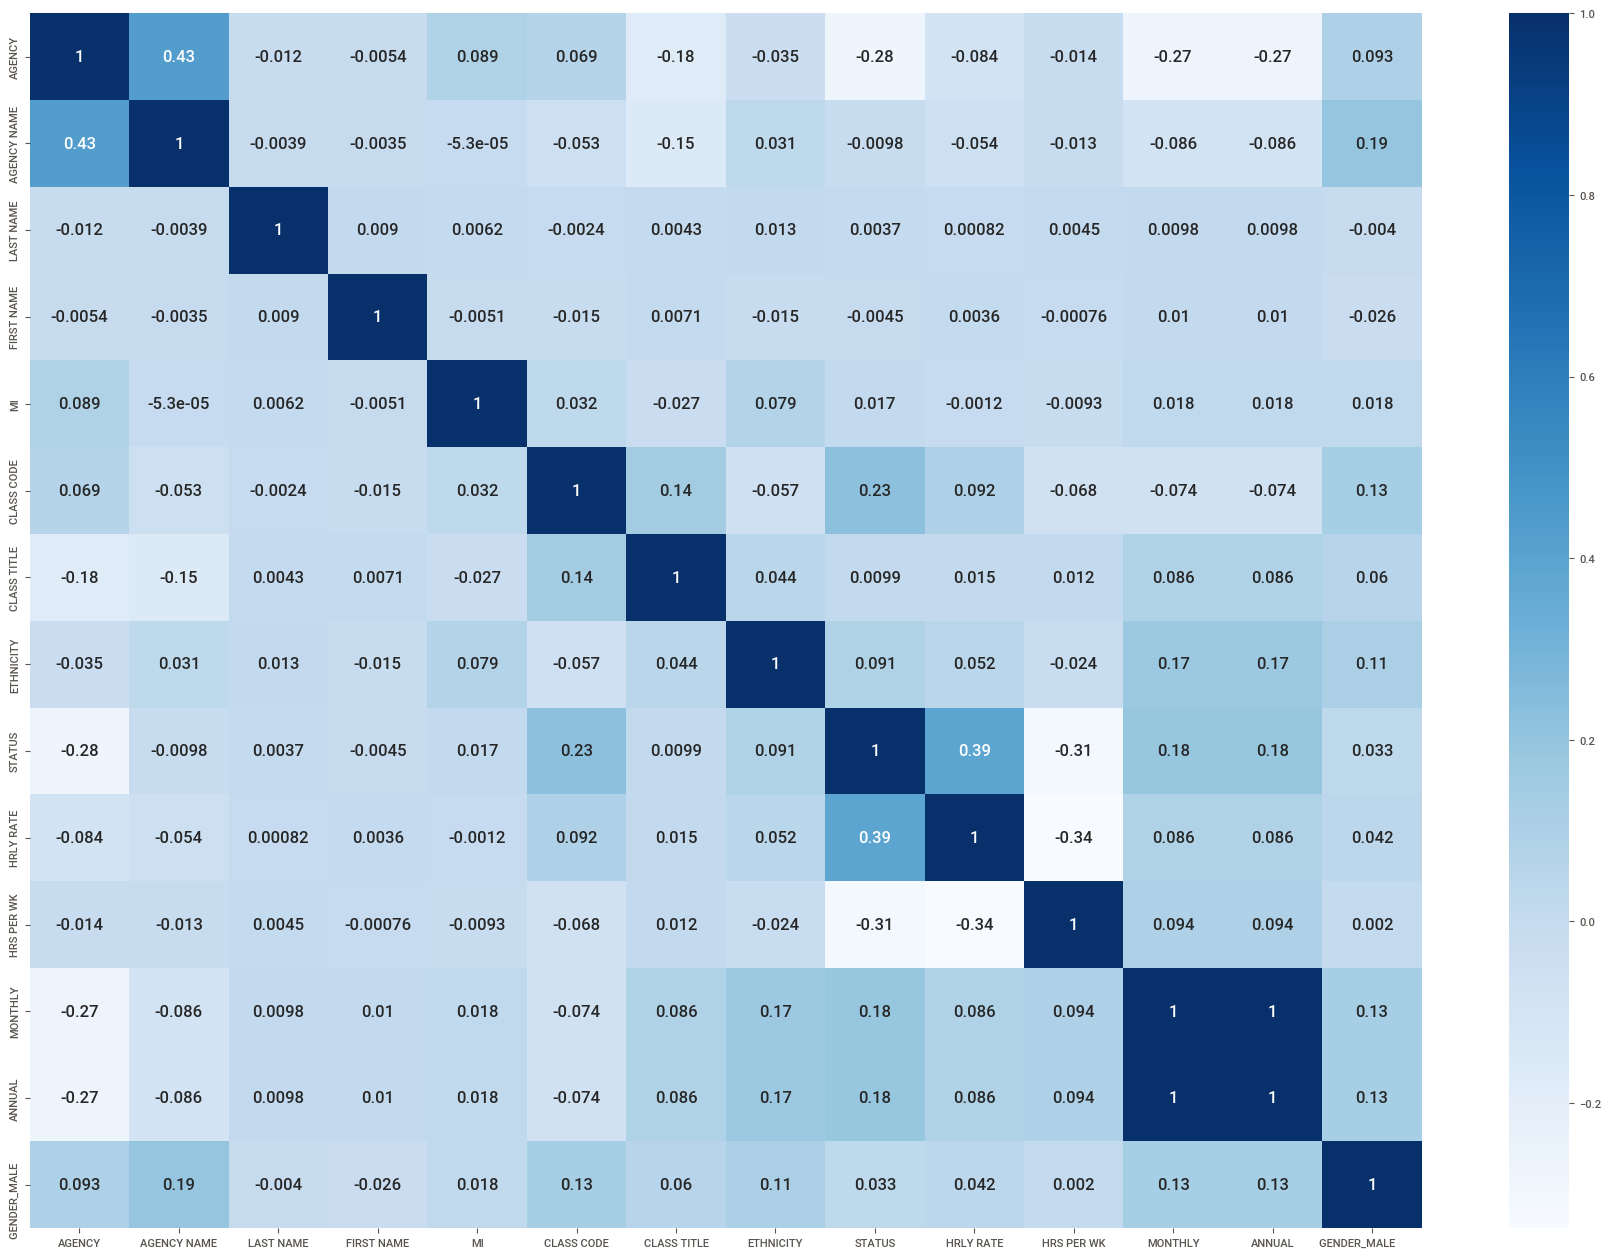

In [222]:
# Correlation 
plt.figure(figsize=(20,15))
sns.heatmap(data.drop("EMPLOY DATE",axis=1).corr(),annot=True, cmap="Blues")

In [ ]:
# We can see that Monthly and Annual are highly correlated, so we can drop one of these. 
# We can drop the feature 'Monthly' because Annual is our target.

In [228]:
data.drop(["MONTHLY"],axis=1,inplace=True)

## Model Building

In [230]:
x=data.drop(['EMPLOY DATE','ANNUAL'], axis=1)
y=data[['ANNUAL']]

In [232]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [234]:
X_train.shape, X_test.shape

((119584, 12), (29897, 12))

In [236]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [238]:
X_test_sc.shape

(29897, 12)

In [240]:
model = LinearRegression()
model.fit(X_train_sc,y_train)

LinearRegression()

In [242]:
y_pred = model.predict(X_test_sc)

In [244]:
print("MSE : ",mean_squared_error(y_test,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("R2-Score : ",r2_score(y_test,y_pred))
print("Adjusted R2 : ",1-(1-0.15)*(29897-1)/(29897-12-1))

MSE :  543886665.0178566
RMSE :  23321.377854188988
MAE :  15340.543897109375
R2-Score :  0.15301522310087545
Adjusted R2 :  0.14965868023022355


In [246]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_sc,y_train)

DecisionTreeRegressor()

In [248]:
y_pred_dt = dt.predict(X_test_sc)

In [250]:
print("MSE : ",mean_squared_error(y_test,y_pred_dt))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("MAE : ",mean_absolute_error(y_test,y_pred_dt))
print("R2-Score : ",r2_score(y_test,y_pred_dt))
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_dt))*(29897-1)/(29897-12-1))

MSE :  74335865.5076242
RMSE :  8621.824952272238
MAE :  4029.701197444568
R2-Score :  0.884238113356739
Adjusted R2 :  0.8841916288620355


In [313]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_sc,y_train)

RandomForestRegressor()

In [314]:
y_pred_rf = rf.predict(X_test_sc)

In [315]:
print("MSE : ",mean_squared_error(y_test,y_pred_rf))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("MAE : ",mean_absolute_error(y_test,y_pred_rf))
print("R2-Score : ",r2_score(y_test,y_pred_rf))
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_rf))*(29897-1)/(29897-12-1))

MSE :  49952269.3408805
RMSE :  7067.6919387364715
MAE :  3191.5667531528106
R2-Score :  0.9222102426396103
Adjusted R2 :  0.9221790059548183


In [321]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_sc,y_train)

GradientBoostingRegressor()

In [322]:
y_pred_gbr = gbr.predict(X_test_sc)

In [323]:
print("MSE : ",mean_squared_error(y_test,y_pred_gbr))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))
print("MAE : ",mean_absolute_error(y_test,y_pred_gbr))
print("R2-Score : ",r2_score(y_test,y_pred_gbr))
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_gbr))*(29897-1)/(29897-12-1))

MSE :  182838501.9517027
RMSE :  13521.778801315406
MAE :  7679.108029504349
R2-Score :  0.7152689379154962
Adjusted R2 :  0.7151546033971916


In [328]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_sc,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [329]:
y_pred_xgb = xgb.predict(X_test_sc)

In [332]:
print("MSE : ",mean_squared_error(y_test,y_pred_xgb))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print("MAE : ",mean_absolute_error(y_test,y_pred_xgb))
print("R2-Score : ",r2_score(y_test,y_pred_xgb))
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_xgb))*(29897-1)/(29897-12-1))

MSE :  51729039.22735362
RMSE :  7192.290263007578
MAE :  3707.767695948799
R2-Score :  0.9194433093070984
Adjusted R2 :  0.9194109615528381


In [89]:
#Model Performances
print("Linear regression accuracy : ",r2_score(y_test,y_pred))
print("Decision tree accuracy : ",r2_score(y_test,y_pred_dt))
print("Random Forest accuracy : ",r2_score(y_test,y_pred_rf))
print("Gradient Boosting accuracy : ",r2_score(y_test,y_pred_gbr))
print("XGBoost accuracy : ",r2_score(y_test,y_pred_xgb))

Linear regression accuracy :  0.15301522310087545
Decision tree accuracy :  0.8735801736318506
Random Forest accuracy :  0.9230478509645448
Gradient Boosting accuracy :  0.7152812255890963
XGBoost accuracy :  0.9194433093070984


## **Results:-**

1. **Who are the outliers in the salaries?**
  - ERF and URF categories showed the highest concentration of salary outliers.
  - Outliers mostly represented executive or senior-level employees.

2. **What departments/roles have the biggest wage disparities between managers and employees?**
  - Departments with largest wage gaps:

      - Comptroller of Public Accounts – Judiciary Section

      - Health & Services Section
   
      - Transportation agencies

    Managers earned significantly more than regular employees.

3. **Have salaries and total compensations for some roles/ departments/ head-count changed over time?**
   
   Some departments showed steady increase in compensation.

   Other roles had fluctuating or stagnant salaries, influenced by departmental budgets and headcount.

